___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [113]:
from google.colab import drive
#drive.mount('/content/drive')

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [114]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [115]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [116]:
!pip install cartopy
import cartopy

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
plt.rcParams["figure.figsize"] = (10, 8)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [118]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [119]:
SEED = 32
keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [120]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.10, random_state=SEED)


In [122]:
print(f"There are {len(x_train)} image the training dataset")
print(f"There are {len(x_test)} image the test dataset")

There are 54000 image the training dataset
There are 10000 image the test dataset


In [123]:
x_train.shape

(54000, 28, 28)

In [124]:
x_test.shape

(10000, 28, 28)

In [125]:
x_val.shape

(6000, 28, 28)

In [126]:
x_train[3].shape

(28, 28)

In [127]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [128]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

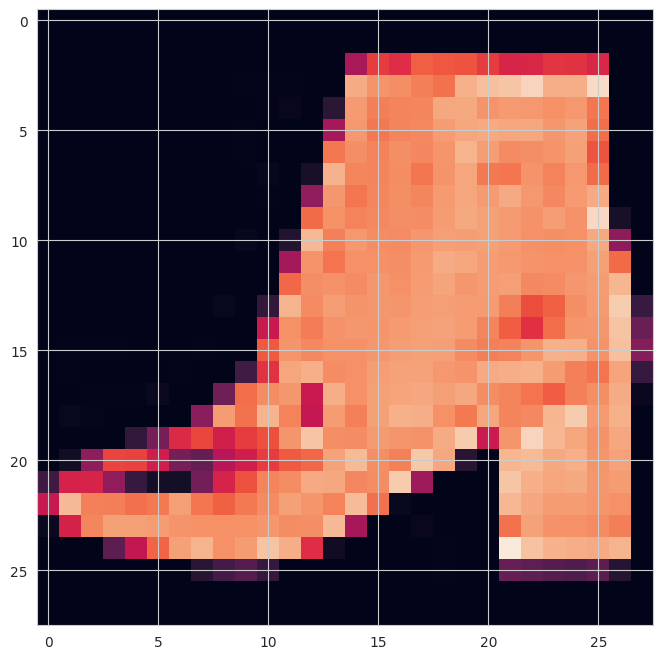

In [129]:
plt.imshow(x_train[1])
plt.show()

In [130]:
classes[int(y_train[1])]

'Ankle boot'

In [131]:
y_train[1]

9

In [132]:
np.unique(y_train, return_counts=True)
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([600, 600, 600, 600, 600, 600, 600, 600, 600, 600]))

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [133]:
classes = [
        'T-shirt/top',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot'
]

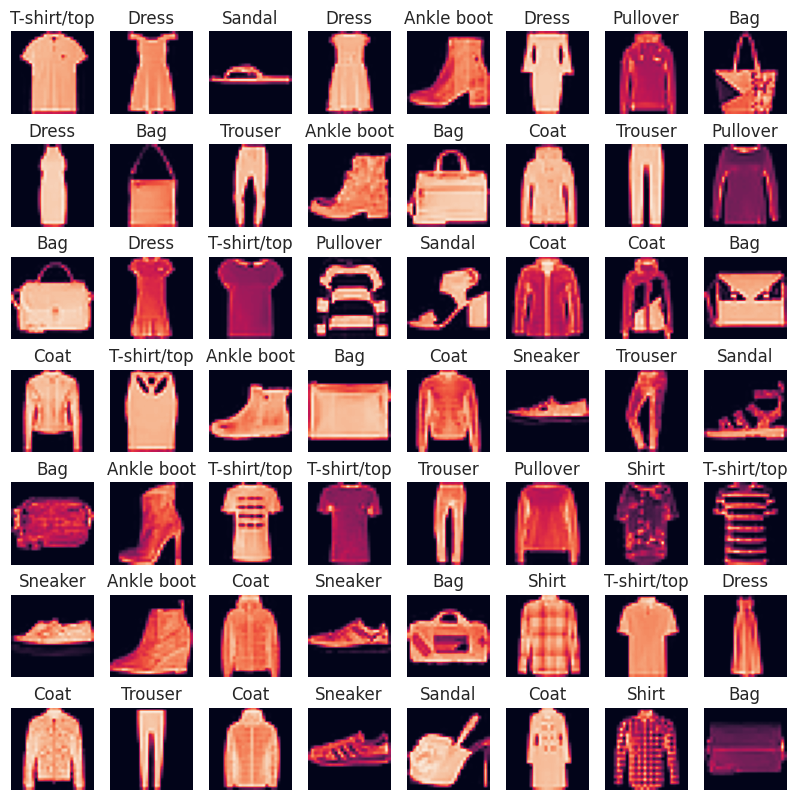

In [134]:
fig, axes = plt.subplots(7, 8)
fig.set_size_inches(10, 10)
for ax in axes.flatten():
    rand_ind = int(np.random.randint(0, 54000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_ind])])
    ax.imshow(x_train[rand_ind])
plt.show()

In [135]:
# before changing the scale of pixels values
print(x_train[3].min(),' to ',x_train[3].max())

0  to  255


In [136]:
from re import X
# parse numbers as floats
x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")
# since all pixel`s value are in the range of 0–255. We divide by 255 so that the pixel values lie between 0 and 1
x_train /= 255
x_val  /=255
x_test /= 255

In [137]:
# after changing the scale of pixels values
print(x_train[3].min(),' to ',x_train[3].max())

0.0  to  1.0


In [138]:
print(x_val[3].min(),' to ',x_val[3].max())

0.0  to  1.0


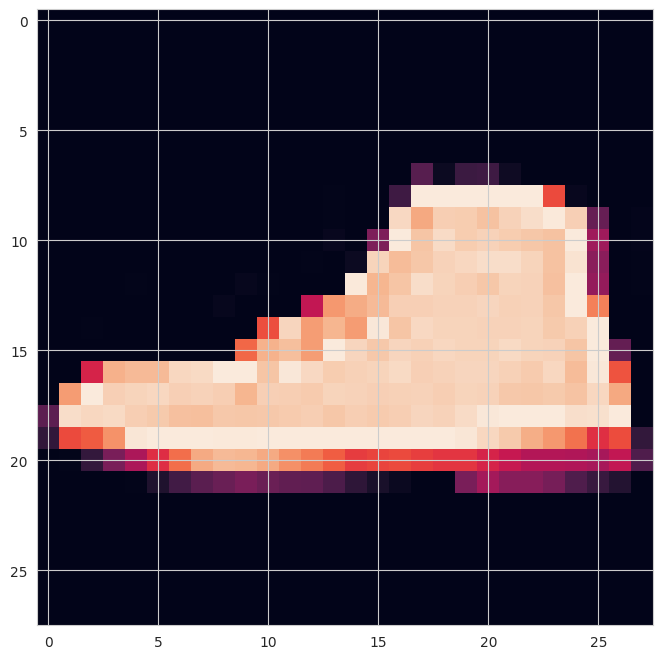

In [139]:
plt.imshow(x_train[3])
plt.show()

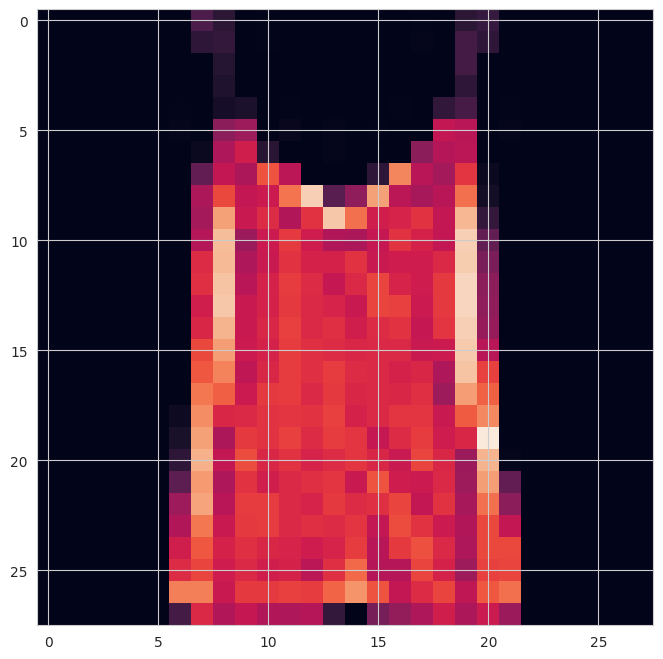

In [140]:
plt.imshow(x_val[3])
plt.show()

In [141]:
x_train.shape, x_val.shape

((54000, 28, 28), (6000, 28, 28))

In [142]:
x_train.shape, x_test.shape

((54000, 28, 28), (10000, 28, 28))

In [143]:
y_train.shape


(54000,)

In [144]:
y_test.shape

(10000,)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [145]:
# before reshaping
print(f'shape of the train: {x_train.shape}')
print(f'shape of the test: {x_test.shape}')
print(f'shape of the val: {x_val.shape}')

shape of the train: (54000, 28, 28)
shape of the test: (10000, 28, 28)
shape of the val: (6000, 28, 28)


In [146]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)

In [147]:
# after reshaping
print(f'shape of the train: {x_train.shape}')
print(f'shape of the test: {x_test.shape}')
print(f'shape of the val: {x_val.shape}')

shape of the train: (54000, 28, 28, 1)
shape of the test: (10000, 28, 28, 1)
shape of the val: (6000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test and y_val values to be one-hot encoded for categorical analysis by Keras.**

In [148]:
from tensorflow.keras.utils import to_categorical

In [149]:
# before encoding
print('''
  shape of y_train is {}
  shape of y_test is {}
  shape of y_val is {}

'''.format(y_train[3],y_test[3], y_val[3])
)


  shape of y_train is 9
  shape of y_test is 1
  shape of y_val is 0




In [150]:
y_train=to_categorical(y_train ,num_classes=10)
y_val=to_categorical(y_val ,num_classes=10)
y_test=to_categorical(y_test ,num_classes=10)

In [151]:
# after encoding
print('''
shape of y_train is {}
shape of y_test is {}
shape of y_val is {}

'''.format(y_train[3],y_test[3], y_val[3]))


shape of y_train is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
shape of y_test is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of y_val is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]




# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [153]:
model = Sequential()

# building the model with one 2D convulation layer, one Maxpooling layer, and one flatten layer
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [154]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

In [156]:
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

In [157]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
)

Epoch 1/100
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5114 - accuracy: 0.8212 - val_loss: 0.3134 - val_accuracy: 0.8892
Epoch 2/100
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3640 - accuracy: 0.8730 - val_loss: 0.3161 - val_accuracy: 0.8913
Epoch 3/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3314 - accuracy: 0.8848 - val_loss: 0.2919 - val_accuracy: 0.8925
Epoch 4/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3217 - accuracy: 0.8880 - val_loss: 0.2792 - val_accuracy: 0.9008
Epoch 5/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3130 - accuracy: 0.8919 - val_loss: 0.2688 - val_accuracy: 0.9032
Epoch 6/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3067 - accuracy: 0.8942 - val_loss: 0.2985 - val_accuracy: 0.8958
Epoch 7/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3011 - accuracy: 0.8986 - val_loss: 0.2784 - va

**TASK 7: Plot values of metrics you used in your model.**

In [158]:
model.metrics_names

['loss', 'accuracy']

In [159]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.511,0.821,0.313,0.889
1,0.364,0.873,0.316,0.891
2,0.331,0.885,0.292,0.892
3,0.322,0.888,0.279,0.901
4,0.313,0.892,0.269,0.903
5,0.307,0.894,0.299,0.896
6,0.301,0.899,0.278,0.902


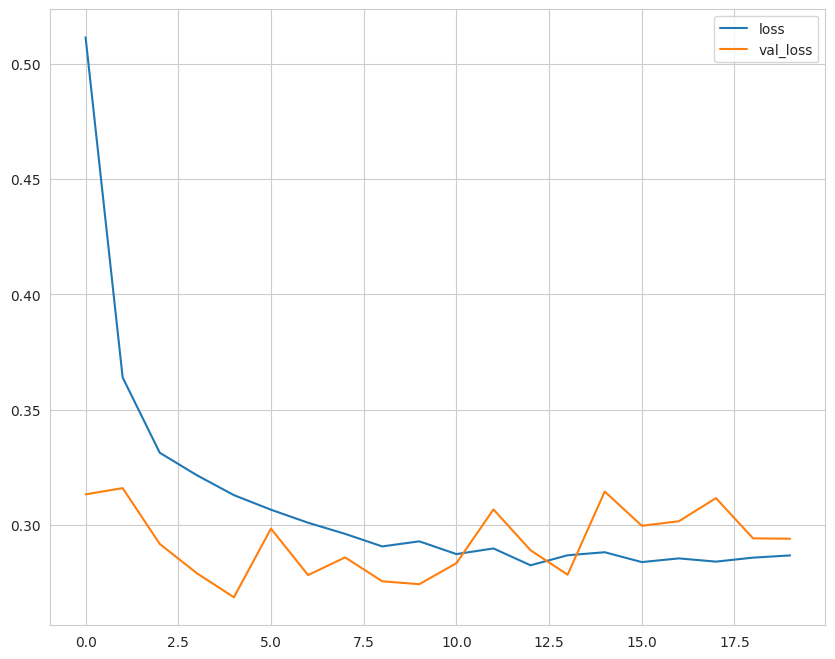

In [160]:
summary[["loss", "val_loss"]].plot()
plt.show()

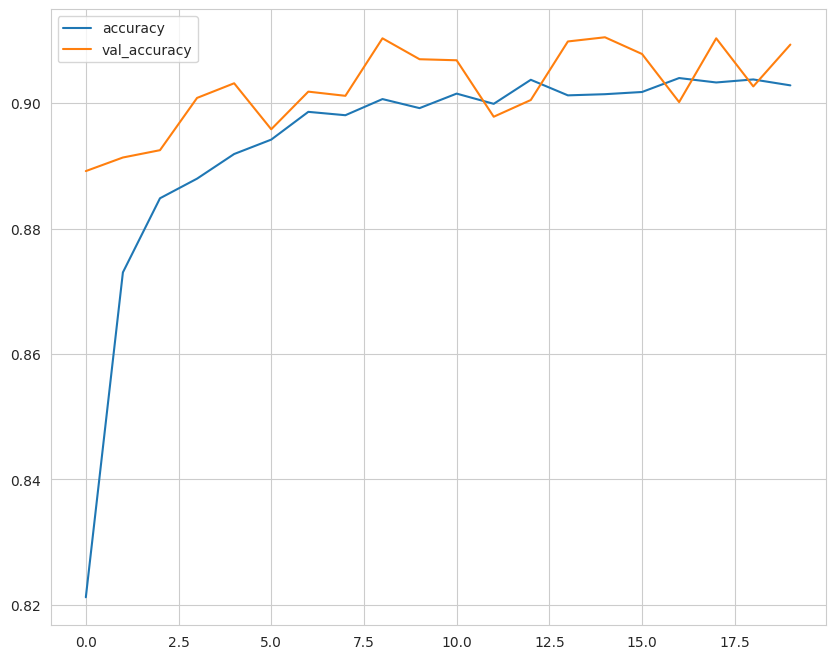

In [161]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [162]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [163]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2902 - accuracy: 0.8955


[0.29017767310142517, 0.8955000042915344]

In [164]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29017767310142517
Test accuracy: 0.8955000042915344


In [165]:
#convert to single-hot just try in one sample from test set
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

2

In [166]:
#here in all samples in test sets
#convert the x-test and y-test into single-digit ones since Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors
import numpy as np

y_preds = model.predict(x_test)
y_preds = [np.argmax(i) for i in y_preds]

y_test = [np.argmax(i) for i in y_test]

313/313 [==============================] - 1s 2ms/step


In [167]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.83      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.62      0.69      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [168]:
print(confusion_matrix(y_test, y_preds))

[[908   1  13  15   5   2  54   0   2   0]
 [  5 971   1  17   3   0   2   0   1   0]
 [ 24   0 843   8  73   0  52   0   0   0]
 [ 32   4  12 901  29   0  21   0   1   0]
 [  0   1  93  30 827   0  48   0   1   0]
 [  0   0   0   0   0 979   0  13   0   8]
 [190   1  82  25  72   0 623   0   7   0]
 [  0   0   0   0   0   7   0 959   1  33]
 [  2   2   2   4   3   2  10   3 972   0]
 [  0   0   0   0   0   6   0  22   0 972]]


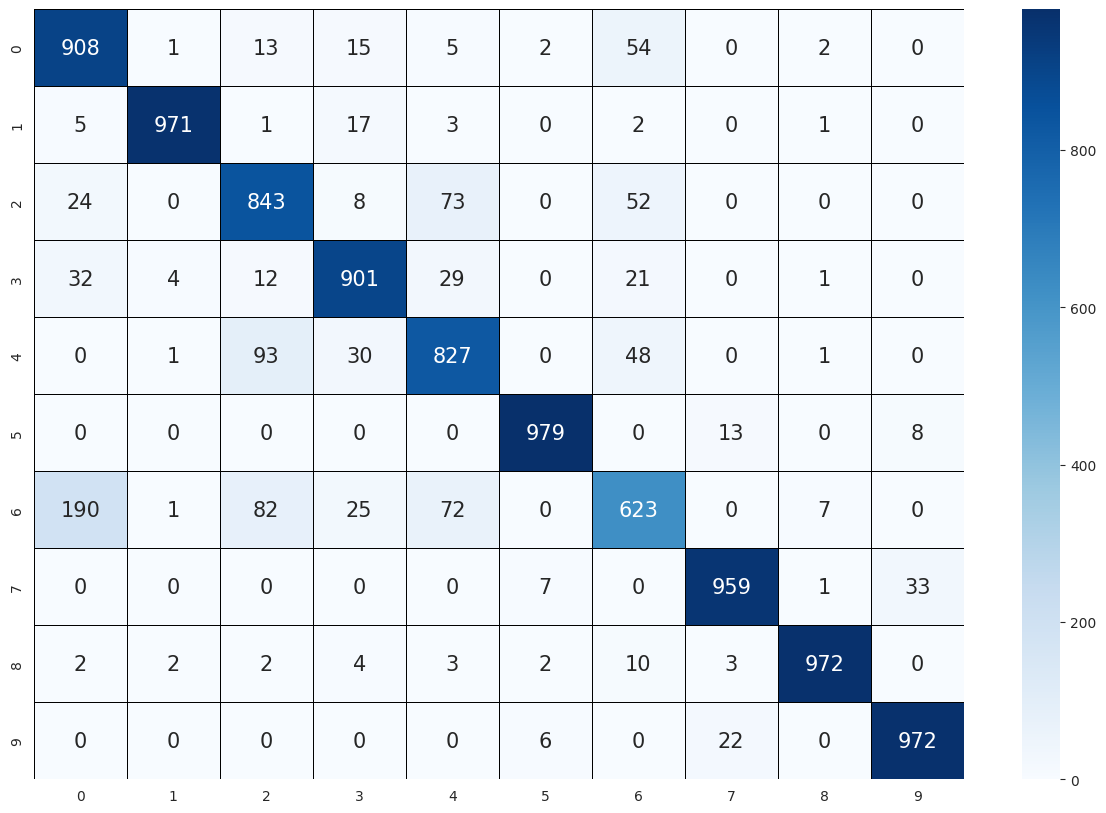

In [169]:
# apperentily our model keep mistaken class 0 with class 6
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_preds),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

## Prediction

In [173]:
my_clothes = x_test[3]

In [174]:
my_clothes.shape

(28, 28, 1)

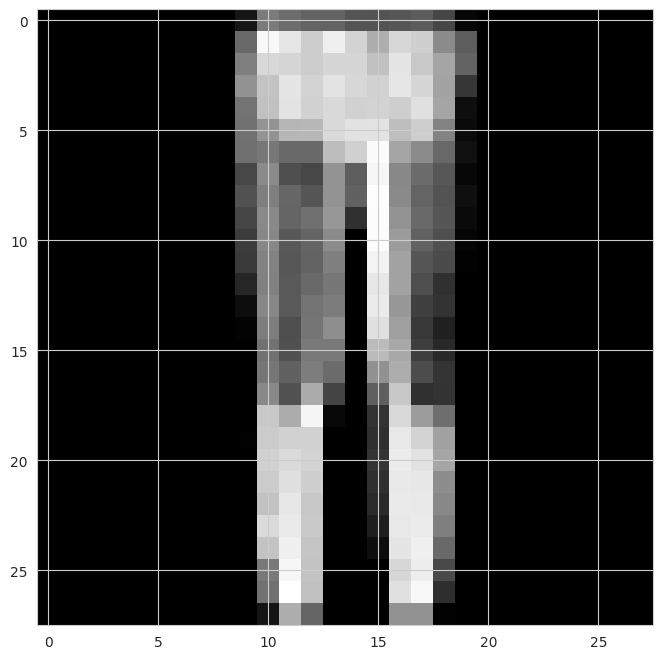

In [175]:
plt.imshow(my_clothes, cmap="gray")
plt.show()

In [176]:
np.expand_dims(my_clothes, 0).shape

(1, 28, 28, 1)

In [177]:
y_preds = model.predict(np.expand_dims(my_clothes, 0))
y_preds

1/1 [==============================] - 0s 26ms/step


array([[1.8029854e-10, 1.0000000e+00, 3.0125853e-11, 8.1378060e-09,
        2.8688055e-08, 5.1518392e-13, 1.1990335e-09, 3.0077018e-13,
        2.7306954e-12, 1.8197709e-12]], dtype=float32)

In [178]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(y_preds)
y_pred

1

In [179]:
model.save("/content/drive/MyDrive/cnn-1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Using the saved model

In [180]:
model = tf.keras.models.load_model("/content/drive/MyDrive/cnn-1.h5")

In [181]:
pred = model.predict(np.expand_dims(x_test[24], 0))

1/1 [==============================] - 0s 68ms/step


In [182]:
np.argmax(pred)

1

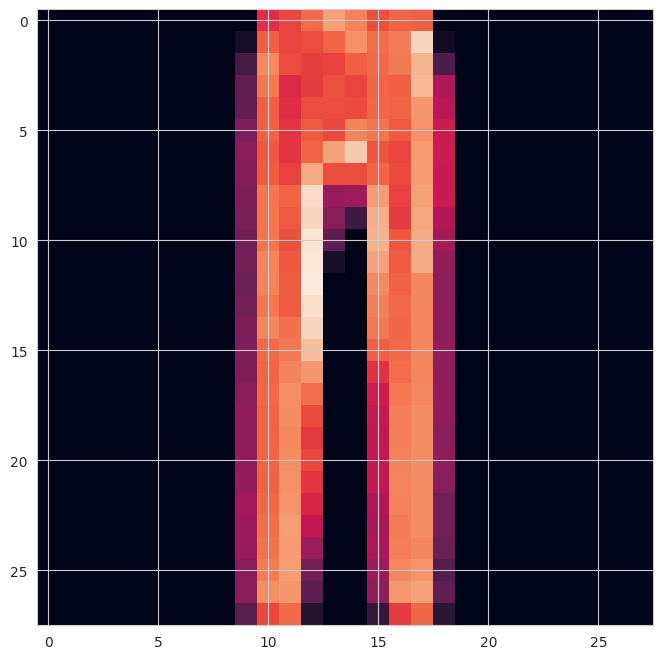

In [183]:
plt.imshow(x_test[24].reshape(28, 28))
plt.show()

# End of Assignment

In [184]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Model configuration
batch_size = 64
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = 'categorical_crossentropy'
no_epochs = 80
optimizer = 'rmsprop'
verbosity = 1
num_folds = 10

In [205]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [186]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [206]:
# Parse numbers as floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescaling the data
X_train = X_train / 255
X_test = X_test / 255

In [188]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [207]:
X_train.shape

(60000, 28, 28)

In [199]:
y_train.shape

(60000,)

In [208]:
# Encoding
y_train=to_categorical(y_train ,num_classes=10)
y_test=to_categorical(y_test ,num_classes=10)

In [203]:
y_train.shape

(60000, 10)

In [190]:
from sklearn.model_selection import KFold

In [191]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

In [213]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [214]:
# We trying K-fold Cross Validation with 10 folds
fold_no = 1
for train, test in kfold.split(X, Y):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28,28,1), activation="relu"))
  model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="softmax"))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[early_stop])

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


####### Unfortunately the K-fold Cross Validation overfit the data by giving us a high accuracy in training while the loss in validatin are high :(
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
928/938 [============================>.] - ETA: 0s - loss: 0.5085 - accuracy: 0.8245

938/938 [==============================] - 5s 4ms/step - loss: 0.5076 - accuracy: 0.8248
Epoch 2/100
930/938 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8764

938/938 [==============================] - 4s 4ms/step - loss: 0.3495 - accuracy: 0.8764
Epoch 3/100
935/938 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8888

938/938 [==============================] - 4s 5ms/step - loss: 0.3139 - accuracy: 0.8889
Epoch 4/100
930/938 [============================>.] - ETA: 0s - loss: 0.2950 - accuracy: 0.8963

938/938 [==============================] - 4s 4ms/step - loss: 0.2946 - accuracy: 0.8964
Epoch 5/100
935/938 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.9007

938/938 [==============================] - 4s 4ms/step - loss: 0.2790 - accuracy: 0.9007
Epoch 6/100
926/938 [============================>.] - ETA: 0s - loss: 0.2681 - accuracy: 0.9042

938/938 [==============================] - 4s 5ms/step - loss: 0.2680 - accuracy: 0.9041
Epoch 7/100
932/938 [============================>.] - ETA: 0s - loss: 0.2569 - accuracy: 0.9083

938/938 [==============================] - 4s 4ms/step - loss: 0.2568 - accuracy: 0.9083
Epoch 8/100
938/938 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9114

938/938 [==============================] - 4s 4ms/step - loss: 0.2484 - accuracy: 0.9114
Epoch 9/100
932/938 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9129

938/938 [==============================] - 4s 4ms/step - loss: 0.2437 - accuracy: 0.9130
Epoch 10/100
930/938 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.9138

938/938 [==============================] - 4s 4ms/step - loss: 0.2415 - accuracy: 0.9138
Epoch 11/100
925/938 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9160

938/938 [==============================] - 4s 4ms/step - loss: 0.2343 - accuracy: 0.9160
Epoch 12/100
929/938 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.9186

938/938 [==============================] - 4s 4ms/step - loss: 0.2295 - accuracy: 0.9185
Epoch 13/100
936/938 [============================>.] - ETA: 0s - loss: 0.2286 - accuracy: 0.9188

938/938 [==============================] - 4s 4ms/step - loss: 0.2286 - accuracy: 0.9188
Epoch 14/100
932/938 [============================>.] - ETA: 0s - loss: 0.2255 - accuracy: 0.9202

938/938 [==============================] - 4s 4ms/step - loss: 0.2254 - accuracy: 0.9202
Epoch 15/100
930/938 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9216

938/938 [==============================] - 4s 4ms/step - loss: 0.2207 - accuracy: 0.9216
Epoch 16/100
935/938 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9218

938/938 [==============================] - 4s 4ms/step - loss: 0.2194 - accuracy: 0.9218
Epoch 17/100
935/938 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9237

938/938 [==============================] - 4s 4ms/step - loss: 0.2171 - accuracy: 0.9237
Epoch 18/100
935/938 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9243

938/938 [==============================] - 4s 4ms/step - loss: 0.2141 - accuracy: 0.9243
Epoch 19/100
936/938 [============================>.] - ETA: 0s - loss: 0.2089 - accuracy: 0.9259

938/938 [==============================] - 4s 4ms/step - loss: 0.2088 - accuracy: 0.9260
Epoch 20/100
931/938 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9236

938/938 [==============================] - 4s 4ms/step - loss: 0.2167 - accuracy: 0.9236
Epoch 21/100
935/938 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9272

938/938 [==============================] - 4s 4ms/step - loss: 0.2043 - accuracy: 0.9271
Epoch 22/100
936/938 [============================>.] - ETA: 0s - loss: 0.2092 - accuracy: 0.9255

938/938 [==============================] - 4s 5ms/step - loss: 0.2091 - accuracy: 0.9255
Epoch 23/100
934/938 [============================>.] - ETA: 0s - loss: 0.2088 - accuracy: 0.9258

938/938 [==============================] - 4s 4ms/step - loss: 0.2087 - accuracy: 0.9259
Epoch 24/100
930/938 [============================>.] - ETA: 0s - loss: 0.2051 - accuracy: 0.9268

938/938 [==============================] - 4s 4ms/step - loss: 0.2049 - accuracy: 0.9269
Epoch 25/100
928/938 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9272

938/938 [==============================] - 4s 4ms/step - loss: 0.2043 - accuracy: 0.9273
Epoch 26/100
925/938 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9282

938/938 [==============================] - 4s 4ms/step - loss: 0.2015 - accuracy: 0.9283
Epoch 27/100
927/938 [============================>.] - ETA: 0s - loss: 0.1999 - accuracy: 0.9298

938/938 [==============================] - 4s 4ms/step - loss: 0.1992 - accuracy: 0.9301
Epoch 28/100
937/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9299

938/938 [==============================] - 4s 4ms/step - loss: 0.1986 - accuracy: 0.9299
Epoch 29/100
937/938 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9290

938/938 [==============================] - 4s 4ms/step - loss: 0.1996 - accuracy: 0.9290
Epoch 30/100
937/938 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9314

938/938 [==============================] - 4s 4ms/step - loss: 0.1959 - accuracy: 0.9314
Epoch 31/100
930/938 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9296

938/938 [==============================] - 4s 4ms/step - loss: 0.1965 - accuracy: 0.9297
Epoch 32/100
933/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9290

938/938 [==============================] - 4s 4ms/step - loss: 0.1975 - accuracy: 0.9291
Epoch 33/100
930/938 [============================>.] - ETA: 0s - loss: 0.1938 - accuracy: 0.9316

938/938 [==============================] - 4s 4ms/step - loss: 0.1940 - accuracy: 0.9315
Epoch 34/100
938/938 [==============================] - ETA: 0s - loss: 0.2005 - accuracy: 0.9293

938/938 [==============================] - 4s 4ms/step - loss: 0.2005 - accuracy: 0.9293
Epoch 35/100
930/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9316

938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9314
Epoch 36/100
928/938 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9302

938/938 [==============================] - 4s 4ms/step - loss: 0.1985 - accuracy: 0.9301
Epoch 37/100
935/938 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9315

938/938 [==============================] - 4s 4ms/step - loss: 0.1915 - accuracy: 0.9313
Epoch 38/100
934/938 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9314

938/938 [==============================] - 4s 5ms/step - loss: 0.1929 - accuracy: 0.9314
Epoch 39/100
934/938 [============================>.] - ETA: 0s - loss: 0.1961 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.1961 - accuracy: 0.9323
Epoch 40/100
931/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9311

938/938 [==============================] - 4s 4ms/step - loss: 0.1965 - accuracy: 0.9312
Epoch 41/100
932/938 [============================>.] - ETA: 0s - loss: 0.1967 - accuracy: 0.9316

938/938 [==============================] - 4s 4ms/step - loss: 0.1972 - accuracy: 0.9316
Epoch 42/100
932/938 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.1928 - accuracy: 0.9319
Epoch 43/100
934/938 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9317

938/938 [==============================] - 4s 4ms/step - loss: 0.1941 - accuracy: 0.9317
Epoch 44/100
930/938 [============================>.] - ETA: 0s - loss: 0.1935 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.1935 - accuracy: 0.9323
Epoch 45/100
931/938 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9325

938/938 [==============================] - 4s 4ms/step - loss: 0.1933 - accuracy: 0.9325
Epoch 46/100
931/938 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9320

938/938 [==============================] - 4s 4ms/step - loss: 0.1948 - accuracy: 0.9320
Epoch 47/100
930/938 [============================>.] - ETA: 0s - loss: 0.1927 - accuracy: 0.9341

938/938 [==============================] - 4s 4ms/step - loss: 0.1932 - accuracy: 0.9339
Epoch 48/100
934/938 [============================>.] - ETA: 0s - loss: 0.1916 - accuracy: 0.9340

938/938 [==============================] - 4s 4ms/step - loss: 0.1915 - accuracy: 0.9341
Epoch 49/100
929/938 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9332

938/938 [==============================] - 4s 4ms/step - loss: 0.1913 - accuracy: 0.9331
Epoch 50/100
930/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.1890 - accuracy: 0.9342
Epoch 51/100
934/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9328

938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9328
Epoch 52/100
935/938 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9340

938/938 [==============================] - 4s 4ms/step - loss: 0.1913 - accuracy: 0.9339
Epoch 53/100
932/938 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9329

938/938 [==============================] - 4s 4ms/step - loss: 0.1945 - accuracy: 0.9328
Epoch 54/100
927/938 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9358

938/938 [==============================] - 4s 5ms/step - loss: 0.1905 - accuracy: 0.9358
Epoch 55/100
933/938 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.1921 - accuracy: 0.9330
Epoch 56/100
936/938 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9339

938/938 [==============================] - 4s 4ms/step - loss: 0.1924 - accuracy: 0.9339
Epoch 57/100
930/938 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.9344

938/938 [==============================] - 4s 5ms/step - loss: 0.1916 - accuracy: 0.9344
Epoch 58/100
938/938 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.9356

938/938 [==============================] - 4s 4ms/step - loss: 0.1909 - accuracy: 0.9356
Epoch 59/100
927/938 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9350

938/938 [==============================] - 4s 4ms/step - loss: 0.1941 - accuracy: 0.9350
Epoch 60/100
932/938 [============================>.] - ETA: 0s - loss: 0.1916 - accuracy: 0.9354

938/938 [==============================] - 4s 5ms/step - loss: 0.1915 - accuracy: 0.9355
Epoch 61/100
937/938 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9358

938/938 [==============================] - 4s 4ms/step - loss: 0.1897 - accuracy: 0.9357
Epoch 62/100
938/938 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9345

938/938 [==============================] - 4s 4ms/step - loss: 0.1898 - accuracy: 0.9345
Epoch 63/100
934/938 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9343

938/938 [==============================] - 4s 5ms/step - loss: 0.1926 - accuracy: 0.9343
Epoch 64/100
938/938 [==============================] - ETA: 0s - loss: 0.1935 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.1935 - accuracy: 0.9351
Epoch 65/100
927/938 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9342

938/938 [==============================] - 4s 4ms/step - loss: 0.1909 - accuracy: 0.9341
Epoch 66/100
931/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9345

938/938 [==============================] - 4s 4ms/step - loss: 0.1936 - accuracy: 0.9345
Epoch 67/100
935/938 [============================>.] - ETA: 0s - loss: 0.1982 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.1981 - accuracy: 0.9338
Epoch 68/100
934/938 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9350

938/938 [==============================] - 4s 4ms/step - loss: 0.1923 - accuracy: 0.9351
Epoch 69/100
929/938 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9355

938/938 [==============================] - 4s 4ms/step - loss: 0.1924 - accuracy: 0.9356
Epoch 70/100
928/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.1965 - accuracy: 0.9342
Epoch 71/100
925/938 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9332

938/938 [==============================] - 4s 4ms/step - loss: 0.2028 - accuracy: 0.9330
Epoch 72/100
938/938 [==============================] - ETA: 0s - loss: 0.1947 - accuracy: 0.9347

938/938 [==============================] - 4s 4ms/step - loss: 0.1947 - accuracy: 0.9347
Epoch 73/100
933/938 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9337

938/938 [==============================] - 4s 4ms/step - loss: 0.2020 - accuracy: 0.9337
Epoch 74/100
935/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.1999 - accuracy: 0.9342
Epoch 75/100
930/938 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.9374

938/938 [==============================] - 4s 4ms/step - loss: 0.1923 - accuracy: 0.9373
Epoch 76/100
932/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9342

938/938 [==============================] - 4s 5ms/step - loss: 0.1984 - accuracy: 0.9343
Epoch 77/100
926/938 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9337

938/938 [==============================] - 4s 4ms/step - loss: 0.1998 - accuracy: 0.9338
Epoch 78/100
928/938 [============================>.] - ETA: 0s - loss: 0.1964 - accuracy: 0.9356

938/938 [==============================] - 4s 4ms/step - loss: 0.1957 - accuracy: 0.9358
Epoch 79/100
936/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9344

938/938 [==============================] - 4s 5ms/step - loss: 0.1991 - accuracy: 0.9344
Epoch 80/100
935/938 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9357

938/938 [==============================] - 4s 4ms/step - loss: 0.1972 - accuracy: 0.9357
Epoch 81/100
929/938 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9319

938/938 [==============================] - 4s 4ms/step - loss: 0.2085 - accuracy: 0.9319
Epoch 82/100
930/938 [============================>.] - ETA: 0s - loss: 0.2032 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.2026 - accuracy: 0.9325
Epoch 83/100
935/938 [============================>.] - ETA: 0s - loss: 0.2073 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.2072 - accuracy: 0.9313
Epoch 84/100
928/938 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9340

938/938 [==============================] - 4s 4ms/step - loss: 0.2013 - accuracy: 0.9340
Epoch 85/100
935/938 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9322

938/938 [==============================] - 4s 4ms/step - loss: 0.2053 - accuracy: 0.9323
Epoch 86/100
938/938 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9326

938/938 [==============================] - 4s 4ms/step - loss: 0.2036 - accuracy: 0.9326
Epoch 87/100
929/938 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9333

938/938 [==============================] - 4s 4ms/step - loss: 0.2070 - accuracy: 0.9334
Epoch 88/100
937/938 [============================>.] - ETA: 0s - loss: 0.2102 - accuracy: 0.9332

938/938 [==============================] - 4s 4ms/step - loss: 0.2101 - accuracy: 0.9332
Epoch 89/100
932/938 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.2096 - accuracy: 0.9337
Epoch 90/100
926/938 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.2100 - accuracy: 0.9325
Epoch 91/100
929/938 [============================>.] - ETA: 0s - loss: 0.2020 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.2022 - accuracy: 0.9335
Epoch 92/100
936/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.2014 - accuracy: 0.9338
Epoch 93/100
937/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9365

938/938 [==============================] - 4s 4ms/step - loss: 0.1997 - accuracy: 0.9365
Epoch 94/100
937/938 [============================>.] - ETA: 0s - loss: 0.2102 - accuracy: 0.9341

938/938 [==============================] - 4s 4ms/step - loss: 0.2101 - accuracy: 0.9341
Epoch 95/100
928/938 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.2102 - accuracy: 0.9351
Epoch 96/100
927/938 [============================>.] - ETA: 0s - loss: 0.2090 - accuracy: 0.9335

938/938 [==============================] - 4s 4ms/step - loss: 0.2093 - accuracy: 0.9336
Epoch 97/100
934/938 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.2105 - accuracy: 0.9331
Epoch 98/100
937/938 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9347

938/938 [==============================] - 4s 5ms/step - loss: 0.2066 - accuracy: 0.9348
Epoch 99/100
934/938 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9325

938/938 [==============================] - 4s 4ms/step - loss: 0.2131 - accuracy: 0.9326
Epoch 100/100
932/938 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.9349

938/938 [==============================] - 4s 4ms/step - loss: 0.2064 - accuracy: 0.9348
Score for fold 1: loss of 0.6443741321563721; accuracy of 90.63000082969666%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
936/938 [============================>.] - ETA: 0s - loss: 0.5175 - accuracy: 0.8208

938/938 [==============================] - 5s 4ms/step - loss: 0.5173 - accuracy: 0.8208
Epoch 2/100
931/938 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.8763

938/938 [==============================] - 4s 4ms/step - loss: 0.3538 - accuracy: 0.8762
Epoch 3/100
934/938 [============================>.] - ETA: 0s - loss: 0.3157 - accuracy: 0.8874

938/938 [==============================] - 4s 5ms/step - loss: 0.3158 - accuracy: 0.8874
Epoch 4/100
926/938 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8953

938/938 [==============================] - 4s 4ms/step - loss: 0.2959 - accuracy: 0.8954
Epoch 5/100
934/938 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.9002

938/938 [==============================] - 4s 4ms/step - loss: 0.2821 - accuracy: 0.9001
Epoch 6/100
930/938 [============================>.] - ETA: 0s - loss: 0.2710 - accuracy: 0.9027

938/938 [==============================] - 4s 4ms/step - loss: 0.2708 - accuracy: 0.9028
Epoch 7/100
934/938 [============================>.] - ETA: 0s - loss: 0.2647 - accuracy: 0.9063

938/938 [==============================] - 4s 4ms/step - loss: 0.2648 - accuracy: 0.9063
Epoch 8/100
936/938 [============================>.] - ETA: 0s - loss: 0.2536 - accuracy: 0.9107

938/938 [==============================] - 4s 4ms/step - loss: 0.2534 - accuracy: 0.9107
Epoch 9/100
936/938 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.9114

938/938 [==============================] - 4s 4ms/step - loss: 0.2486 - accuracy: 0.9114
Epoch 10/100
932/938 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9156

938/938 [==============================] - 4s 4ms/step - loss: 0.2417 - accuracy: 0.9155
Epoch 11/100
935/938 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.9178

938/938 [==============================] - 4s 4ms/step - loss: 0.2356 - accuracy: 0.9178
Epoch 12/100
930/938 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9178

938/938 [==============================] - 4s 4ms/step - loss: 0.2320 - accuracy: 0.9179
Epoch 13/100
934/938 [============================>.] - ETA: 0s - loss: 0.2286 - accuracy: 0.9184

938/938 [==============================] - 4s 4ms/step - loss: 0.2284 - accuracy: 0.9184
Epoch 14/100
937/938 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9192

938/938 [==============================] - 4s 4ms/step - loss: 0.2263 - accuracy: 0.9193
Epoch 15/100
934/938 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9218

938/938 [==============================] - 4s 4ms/step - loss: 0.2248 - accuracy: 0.9219
Epoch 16/100
925/938 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9227

938/938 [==============================] - 4s 5ms/step - loss: 0.2176 - accuracy: 0.9226
Epoch 17/100
929/938 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9225

938/938 [==============================] - 4s 4ms/step - loss: 0.2167 - accuracy: 0.9225
Epoch 18/100
933/938 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9238

938/938 [==============================] - 4s 4ms/step - loss: 0.2161 - accuracy: 0.9238
Epoch 19/100
928/938 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9253

938/938 [==============================] - 4s 5ms/step - loss: 0.2111 - accuracy: 0.9253
Epoch 20/100
937/938 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9261

938/938 [==============================] - 4s 4ms/step - loss: 0.2084 - accuracy: 0.9261
Epoch 21/100
938/938 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9277

938/938 [==============================] - 4s 4ms/step - loss: 0.2058 - accuracy: 0.9277
Epoch 22/100
934/938 [============================>.] - ETA: 0s - loss: 0.2039 - accuracy: 0.9276

938/938 [==============================] - 4s 5ms/step - loss: 0.2037 - accuracy: 0.9277
Epoch 23/100
933/938 [============================>.] - ETA: 0s - loss: 0.2048 - accuracy: 0.9275

938/938 [==============================] - 4s 4ms/step - loss: 0.2044 - accuracy: 0.9276
Epoch 24/100
929/938 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9288

938/938 [==============================] - 4s 4ms/step - loss: 0.2000 - accuracy: 0.9288
Epoch 25/100
934/938 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9282

938/938 [==============================] - 4s 5ms/step - loss: 0.2039 - accuracy: 0.9281
Epoch 26/100
930/938 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.1985 - accuracy: 0.9303
Epoch 27/100
929/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9286

938/938 [==============================] - 4s 4ms/step - loss: 0.1996 - accuracy: 0.9286
Epoch 28/100
932/938 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9294

938/938 [==============================] - 4s 4ms/step - loss: 0.1996 - accuracy: 0.9293
Epoch 29/100
926/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9295

938/938 [==============================] - 4s 4ms/step - loss: 0.1967 - accuracy: 0.9294
Epoch 30/100
928/938 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.1935 - accuracy: 0.9312
Epoch 31/100
929/938 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9315

938/938 [==============================] - 4s 4ms/step - loss: 0.1940 - accuracy: 0.9316
Epoch 32/100
931/938 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9323

938/938 [==============================] - 4s 4ms/step - loss: 0.1919 - accuracy: 0.9323
Epoch 33/100
935/938 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.1869 - accuracy: 0.9344
Epoch 34/100
935/938 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.1886 - accuracy: 0.9330
Epoch 35/100
938/938 [==============================] - ETA: 0s - loss: 0.1890 - accuracy: 0.9341

938/938 [==============================] - 4s 4ms/step - loss: 0.1890 - accuracy: 0.9341
Epoch 36/100
931/938 [============================>.] - ETA: 0s - loss: 0.1866 - accuracy: 0.9346

938/938 [==============================] - 4s 4ms/step - loss: 0.1866 - accuracy: 0.9348
Epoch 37/100
938/938 [==============================] - ETA: 0s - loss: 0.1904 - accuracy: 0.9342

938/938 [==============================] - 4s 4ms/step - loss: 0.1904 - accuracy: 0.9342
Epoch 38/100
928/938 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9346

938/938 [==============================] - 4s 5ms/step - loss: 0.1846 - accuracy: 0.9343
Epoch 39/100
935/938 [============================>.] - ETA: 0s - loss: 0.1847 - accuracy: 0.9353

938/938 [==============================] - 4s 4ms/step - loss: 0.1848 - accuracy: 0.9353
Epoch 40/100
929/938 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9352

938/938 [==============================] - 4s 4ms/step - loss: 0.1879 - accuracy: 0.9353
Epoch 41/100
934/938 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9336

938/938 [==============================] - 4s 5ms/step - loss: 0.1927 - accuracy: 0.9334
Epoch 42/100
934/938 [============================>.] - ETA: 0s - loss: 0.1862 - accuracy: 0.9348

938/938 [==============================] - 4s 4ms/step - loss: 0.1859 - accuracy: 0.9349
Epoch 43/100
926/938 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9353

938/938 [==============================] - 4s 4ms/step - loss: 0.1873 - accuracy: 0.9354
Epoch 44/100
932/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9337

938/938 [==============================] - 4s 5ms/step - loss: 0.1887 - accuracy: 0.9337
Epoch 45/100
930/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.1894 - accuracy: 0.9350
Epoch 46/100
931/938 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9361

938/938 [==============================] - 4s 4ms/step - loss: 0.1876 - accuracy: 0.9361
Epoch 47/100
935/938 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9362

938/938 [==============================] - 4s 5ms/step - loss: 0.1898 - accuracy: 0.9362
Epoch 48/100
931/938 [============================>.] - ETA: 0s - loss: 0.1960 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.1959 - accuracy: 0.9337
Epoch 49/100
936/938 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9356

938/938 [==============================] - 4s 4ms/step - loss: 0.1912 - accuracy: 0.9355
Epoch 50/100
927/938 [============================>.] - ETA: 0s - loss: 0.1902 - accuracy: 0.9355

938/938 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9355
Epoch 51/100
938/938 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.9347

938/938 [==============================] - 4s 4ms/step - loss: 0.1909 - accuracy: 0.9347
Epoch 52/100
935/938 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9356

938/938 [==============================] - 4s 4ms/step - loss: 0.1873 - accuracy: 0.9356
Epoch 53/100
932/938 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9361

938/938 [==============================] - 4s 5ms/step - loss: 0.1895 - accuracy: 0.9360
Epoch 54/100
932/938 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9363

938/938 [==============================] - 4s 4ms/step - loss: 0.1908 - accuracy: 0.9363
Epoch 55/100
932/938 [============================>.] - ETA: 0s - loss: 0.1899 - accuracy: 0.9349

938/938 [==============================] - 4s 4ms/step - loss: 0.1900 - accuracy: 0.9348
Epoch 56/100
930/938 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9340

938/938 [==============================] - 4s 5ms/step - loss: 0.1896 - accuracy: 0.9341
Epoch 57/100
929/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9364

938/938 [==============================] - 4s 4ms/step - loss: 0.1889 - accuracy: 0.9363
Epoch 58/100
936/938 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.1917 - accuracy: 0.9338
Epoch 59/100
935/938 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9373

938/938 [==============================] - 4s 4ms/step - loss: 0.1910 - accuracy: 0.9374
Epoch 60/100
927/938 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9366

938/938 [==============================] - 4s 4ms/step - loss: 0.1934 - accuracy: 0.9366
Epoch 61/100
925/938 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9354

938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9352
Epoch 62/100
929/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9355

938/938 [==============================] - 4s 4ms/step - loss: 0.1990 - accuracy: 0.9355
Epoch 63/100
936/938 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.9361

938/938 [==============================] - 4s 4ms/step - loss: 0.1892 - accuracy: 0.9360
Epoch 64/100
937/938 [============================>.] - ETA: 0s - loss: 0.1974 - accuracy: 0.9347

938/938 [==============================] - 4s 4ms/step - loss: 0.1974 - accuracy: 0.9347
Epoch 65/100
932/938 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9364

938/938 [==============================] - 4s 4ms/step - loss: 0.1898 - accuracy: 0.9364
Epoch 66/100
928/938 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9358

938/938 [==============================] - 4s 4ms/step - loss: 0.1949 - accuracy: 0.9358
Epoch 67/100
928/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.1982 - accuracy: 0.9350
Epoch 68/100
928/938 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9348

938/938 [==============================] - 4s 4ms/step - loss: 0.1953 - accuracy: 0.9349
Epoch 69/100
928/938 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.9367

938/938 [==============================] - 4s 5ms/step - loss: 0.1927 - accuracy: 0.9365
Epoch 70/100
934/938 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9354

938/938 [==============================] - 4s 4ms/step - loss: 0.1964 - accuracy: 0.9355
Epoch 71/100
931/938 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.1964 - accuracy: 0.9350
Epoch 72/100
935/938 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9369

938/938 [==============================] - 4s 5ms/step - loss: 0.1945 - accuracy: 0.9370
Epoch 73/100
937/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9360

938/938 [==============================] - 4s 4ms/step - loss: 0.1938 - accuracy: 0.9360
Epoch 74/100
928/938 [============================>.] - ETA: 0s - loss: 0.2016 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.2012 - accuracy: 0.9340
Epoch 75/100
929/938 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9365

938/938 [==============================] - 4s 5ms/step - loss: 0.1943 - accuracy: 0.9365
Epoch 76/100
935/938 [============================>.] - ETA: 0s - loss: 0.1954 - accuracy: 0.9362

938/938 [==============================] - 4s 4ms/step - loss: 0.1955 - accuracy: 0.9362
Epoch 77/100
929/938 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9348

938/938 [==============================] - 4s 4ms/step - loss: 0.2003 - accuracy: 0.9349
Epoch 78/100
933/938 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9316

938/938 [==============================] - 4s 5ms/step - loss: 0.2143 - accuracy: 0.9317
Epoch 79/100
930/938 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9322

938/938 [==============================] - 4s 4ms/step - loss: 0.2089 - accuracy: 0.9320
Epoch 80/100
928/938 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.2194 - accuracy: 0.9320
Epoch 81/100
935/938 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9330

938/938 [==============================] - 4s 5ms/step - loss: 0.2101 - accuracy: 0.9330
Epoch 82/100
927/938 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9319

938/938 [==============================] - 4s 4ms/step - loss: 0.2149 - accuracy: 0.9320
Epoch 83/100
934/938 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9339

938/938 [==============================] - 4s 4ms/step - loss: 0.2142 - accuracy: 0.9339
Epoch 84/100
929/938 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9328

938/938 [==============================] - 4s 5ms/step - loss: 0.2135 - accuracy: 0.9328
Epoch 85/100
927/938 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9337

938/938 [==============================] - 4s 4ms/step - loss: 0.2154 - accuracy: 0.9336
Epoch 86/100
929/938 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9329

938/938 [==============================] - 4s 4ms/step - loss: 0.2124 - accuracy: 0.9327
Epoch 87/100
928/938 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9335

938/938 [==============================] - 4s 5ms/step - loss: 0.2078 - accuracy: 0.9336
Epoch 88/100
937/938 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9331
Epoch 89/100
930/938 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9328

938/938 [==============================] - 4s 4ms/step - loss: 0.2117 - accuracy: 0.9326
Epoch 90/100
936/938 [============================>.] - ETA: 0s - loss: 0.2073 - accuracy: 0.9345

938/938 [==============================] - 4s 5ms/step - loss: 0.2073 - accuracy: 0.9345
Epoch 91/100
927/938 [============================>.] - ETA: 0s - loss: 0.2051 - accuracy: 0.9353

938/938 [==============================] - 4s 4ms/step - loss: 0.2051 - accuracy: 0.9353
Epoch 92/100
930/938 [============================>.] - ETA: 0s - loss: 0.2081 - accuracy: 0.9344

938/938 [==============================] - 4s 4ms/step - loss: 0.2081 - accuracy: 0.9345
Epoch 93/100
933/938 [============================>.] - ETA: 0s - loss: 0.2060 - accuracy: 0.9348

938/938 [==============================] - 4s 5ms/step - loss: 0.2060 - accuracy: 0.9349
Epoch 94/100
937/938 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.2092 - accuracy: 0.9335
Epoch 95/100
934/938 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9352

938/938 [==============================] - 4s 4ms/step - loss: 0.2095 - accuracy: 0.9351
Epoch 96/100
937/938 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9350

938/938 [==============================] - 4s 5ms/step - loss: 0.2082 - accuracy: 0.9350
Epoch 97/100
928/938 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9355

938/938 [==============================] - 4s 4ms/step - loss: 0.2071 - accuracy: 0.9354
Epoch 98/100
934/938 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9346

938/938 [==============================] - 4s 4ms/step - loss: 0.2087 - accuracy: 0.9346
Epoch 99/100
932/938 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9354

938/938 [==============================] - 4s 5ms/step - loss: 0.2112 - accuracy: 0.9356
Epoch 100/100
935/938 [============================>.] - ETA: 0s - loss: 0.2131 - accuracy: 0.9347

938/938 [==============================] - 4s 4ms/step - loss: 0.2131 - accuracy: 0.9346
Score for fold 2: loss of 0.5676229000091553; accuracy of 89.96999859809875%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
933/938 [============================>.] - ETA: 0s - loss: 0.5154 - accuracy: 0.8214

938/938 [==============================] - 5s 4ms/step - loss: 0.5146 - accuracy: 0.8217
Epoch 2/100
934/938 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8771

938/938 [==============================] - 4s 5ms/step - loss: 0.3527 - accuracy: 0.8772
Epoch 3/100
931/938 [============================>.] - ETA: 0s - loss: 0.3166 - accuracy: 0.8872

938/938 [==============================] - 4s 4ms/step - loss: 0.3165 - accuracy: 0.8872
Epoch 4/100
932/938 [============================>.] - ETA: 0s - loss: 0.2966 - accuracy: 0.8939

938/938 [==============================] - 4s 4ms/step - loss: 0.2963 - accuracy: 0.8939
Epoch 5/100
931/938 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.9015

938/938 [==============================] - 4s 5ms/step - loss: 0.2779 - accuracy: 0.9016
Epoch 6/100
938/938 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.9042

938/938 [==============================] - 4s 4ms/step - loss: 0.2699 - accuracy: 0.9042
Epoch 7/100
934/938 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.9081

938/938 [==============================] - 4s 4ms/step - loss: 0.2621 - accuracy: 0.9081
Epoch 8/100
928/938 [============================>.] - ETA: 0s - loss: 0.2531 - accuracy: 0.9099

938/938 [==============================] - 4s 5ms/step - loss: 0.2527 - accuracy: 0.9101
Epoch 9/100
938/938 [==============================] - ETA: 0s - loss: 0.2483 - accuracy: 0.9120

938/938 [==============================] - 4s 4ms/step - loss: 0.2483 - accuracy: 0.9120
Epoch 10/100
935/938 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.9145

938/938 [==============================] - 4s 4ms/step - loss: 0.2432 - accuracy: 0.9145
Epoch 11/100
934/938 [============================>.] - ETA: 0s - loss: 0.2357 - accuracy: 0.9150

938/938 [==============================] - 4s 5ms/step - loss: 0.2358 - accuracy: 0.9150
Epoch 12/100
936/938 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9189

938/938 [==============================] - 4s 4ms/step - loss: 0.2291 - accuracy: 0.9189
Epoch 13/100
934/938 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9168

938/938 [==============================] - 4s 4ms/step - loss: 0.2306 - accuracy: 0.9168
Epoch 14/100
936/938 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9199

938/938 [==============================] - 4s 5ms/step - loss: 0.2252 - accuracy: 0.9199
Epoch 15/100
933/938 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9187

938/938 [==============================] - 4s 4ms/step - loss: 0.2243 - accuracy: 0.9188
Epoch 16/100
926/938 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9216

938/938 [==============================] - 4s 4ms/step - loss: 0.2189 - accuracy: 0.9215
Epoch 17/100
927/938 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9235

938/938 [==============================] - 4s 5ms/step - loss: 0.2116 - accuracy: 0.9233
Epoch 18/100
926/938 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9255

938/938 [==============================] - 4s 4ms/step - loss: 0.2099 - accuracy: 0.9254
Epoch 19/100
938/938 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9250

938/938 [==============================] - 4s 4ms/step - loss: 0.2125 - accuracy: 0.9250
Epoch 20/100
926/938 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9269

938/938 [==============================] - 4s 5ms/step - loss: 0.2065 - accuracy: 0.9269
Epoch 21/100
937/938 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9260

938/938 [==============================] - 4s 4ms/step - loss: 0.2058 - accuracy: 0.9261
Epoch 22/100
933/938 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9274

938/938 [==============================] - 4s 4ms/step - loss: 0.2038 - accuracy: 0.9275
Epoch 23/100
927/938 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9267

938/938 [==============================] - 4s 5ms/step - loss: 0.2082 - accuracy: 0.9268
Epoch 24/100
937/938 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9262

938/938 [==============================] - 4s 4ms/step - loss: 0.2083 - accuracy: 0.9262
Epoch 25/100
927/938 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9276

938/938 [==============================] - 4s 4ms/step - loss: 0.2022 - accuracy: 0.9277
Epoch 26/100
932/938 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9295

938/938 [==============================] - 4s 5ms/step - loss: 0.1976 - accuracy: 0.9295
Epoch 27/100
931/938 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9297

938/938 [==============================] - 4s 4ms/step - loss: 0.2000 - accuracy: 0.9298
Epoch 28/100
929/938 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9291

938/938 [==============================] - 4s 4ms/step - loss: 0.1994 - accuracy: 0.9290
Epoch 29/100
928/938 [============================>.] - ETA: 0s - loss: 0.2047 - accuracy: 0.9292

938/938 [==============================] - 4s 5ms/step - loss: 0.2047 - accuracy: 0.9293
Epoch 30/100
927/938 [============================>.] - ETA: 0s - loss: 0.1960 - accuracy: 0.9307

938/938 [==============================] - 4s 4ms/step - loss: 0.1958 - accuracy: 0.9308
Epoch 31/100
930/938 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9322

938/938 [==============================] - 4s 4ms/step - loss: 0.1928 - accuracy: 0.9323
Epoch 32/100
935/938 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9331

938/938 [==============================] - 4s 5ms/step - loss: 0.1910 - accuracy: 0.9331
Epoch 33/100
936/938 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9330

938/938 [==============================] - 4s 4ms/step - loss: 0.1883 - accuracy: 0.9330
Epoch 34/100
926/938 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9329

938/938 [==============================] - 4s 4ms/step - loss: 0.1883 - accuracy: 0.9328
Epoch 35/100
929/938 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9336

938/938 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9336
Epoch 36/100
926/938 [============================>.] - ETA: 0s - loss: 0.1892 - accuracy: 0.9330

938/938 [==============================] - 4s 4ms/step - loss: 0.1893 - accuracy: 0.9329
Epoch 37/100
930/938 [============================>.] - ETA: 0s - loss: 0.1908 - accuracy: 0.9342

938/938 [==============================] - 4s 4ms/step - loss: 0.1908 - accuracy: 0.9342
Epoch 38/100
933/938 [============================>.] - ETA: 0s - loss: 0.1886 - accuracy: 0.9343

938/938 [==============================] - 4s 5ms/step - loss: 0.1886 - accuracy: 0.9343
Epoch 39/100
930/938 [============================>.] - ETA: 0s - loss: 0.1845 - accuracy: 0.9354

938/938 [==============================] - 4s 4ms/step - loss: 0.1845 - accuracy: 0.9353
Epoch 40/100
932/938 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9341

938/938 [==============================] - 4s 4ms/step - loss: 0.1862 - accuracy: 0.9341
Epoch 41/100
932/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9331

938/938 [==============================] - 4s 5ms/step - loss: 0.1915 - accuracy: 0.9331
Epoch 42/100
936/938 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9346

938/938 [==============================] - 4s 4ms/step - loss: 0.1912 - accuracy: 0.9345
Epoch 43/100
936/938 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.1937 - accuracy: 0.9321
Epoch 44/100
927/938 [============================>.] - ETA: 0s - loss: 0.1902 - accuracy: 0.9336

938/938 [==============================] - 4s 5ms/step - loss: 0.1904 - accuracy: 0.9334
Epoch 45/100
933/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.1975 - accuracy: 0.9333
Epoch 46/100
929/938 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.1906 - accuracy: 0.9339
Epoch 47/100
937/938 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9348

938/938 [==============================] - 4s 5ms/step - loss: 0.1882 - accuracy: 0.9348
Epoch 48/100
936/938 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9332

938/938 [==============================] - 4s 4ms/step - loss: 0.1902 - accuracy: 0.9331
Epoch 49/100
935/938 [============================>.] - ETA: 0s - loss: 0.1920 - accuracy: 0.9338

938/938 [==============================] - 4s 4ms/step - loss: 0.1920 - accuracy: 0.9338
Epoch 50/100
928/938 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9351

938/938 [==============================] - 4s 5ms/step - loss: 0.1879 - accuracy: 0.9349
Epoch 51/100
932/938 [============================>.] - ETA: 0s - loss: 0.1899 - accuracy: 0.9347

938/938 [==============================] - 4s 4ms/step - loss: 0.1901 - accuracy: 0.9346
Epoch 52/100
932/938 [============================>.] - ETA: 0s - loss: 0.1899 - accuracy: 0.9345

938/938 [==============================] - 4s 4ms/step - loss: 0.1895 - accuracy: 0.9345
Epoch 53/100
933/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9347

938/938 [==============================] - 4s 5ms/step - loss: 0.1910 - accuracy: 0.9346
Epoch 54/100
938/938 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.1953 - accuracy: 0.9334
Epoch 55/100
933/938 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.9353

938/938 [==============================] - 4s 4ms/step - loss: 0.1860 - accuracy: 0.9354
Epoch 56/100
928/938 [============================>.] - ETA: 0s - loss: 0.1961 - accuracy: 0.9327

938/938 [==============================] - 4s 5ms/step - loss: 0.1962 - accuracy: 0.9328
Epoch 57/100
933/938 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.2018 - accuracy: 0.9313
Epoch 58/100
929/938 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.2017 - accuracy: 0.9323
Epoch 59/100
929/938 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9329

938/938 [==============================] - 4s 5ms/step - loss: 0.1957 - accuracy: 0.9330
Epoch 60/100
930/938 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9345

938/938 [==============================] - 4s 4ms/step - loss: 0.1956 - accuracy: 0.9344
Epoch 61/100
936/938 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9333

938/938 [==============================] - 4s 4ms/step - loss: 0.1950 - accuracy: 0.9333
Epoch 62/100
935/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9336

938/938 [==============================] - 4s 5ms/step - loss: 0.1946 - accuracy: 0.9336
Epoch 63/100
933/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9330

938/938 [==============================] - 4s 4ms/step - loss: 0.1979 - accuracy: 0.9330
Epoch 64/100
929/938 [============================>.] - ETA: 0s - loss: 0.1933 - accuracy: 0.9354

938/938 [==============================] - 4s 4ms/step - loss: 0.1941 - accuracy: 0.9352
Epoch 65/100
937/938 [============================>.] - ETA: 0s - loss: 0.1933 - accuracy: 0.9332

938/938 [==============================] - 4s 5ms/step - loss: 0.1933 - accuracy: 0.9332
Epoch 66/100
938/938 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9351

938/938 [==============================] - 4s 4ms/step - loss: 0.1936 - accuracy: 0.9351
Epoch 67/100
928/938 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9345

938/938 [==============================] - 4s 4ms/step - loss: 0.1924 - accuracy: 0.9344
Epoch 68/100
934/938 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9352

938/938 [==============================] - 5s 5ms/step - loss: 0.1948 - accuracy: 0.9350
Epoch 69/100
938/938 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9349

938/938 [==============================] - 4s 4ms/step - loss: 0.1966 - accuracy: 0.9349
Epoch 70/100
929/938 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9335

938/938 [==============================] - 4s 4ms/step - loss: 0.2019 - accuracy: 0.9335
Epoch 71/100
930/938 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9339

938/938 [==============================] - 4s 5ms/step - loss: 0.1912 - accuracy: 0.9341
Epoch 72/100
929/938 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.2009 - accuracy: 0.9334
Epoch 73/100
927/938 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9350

938/938 [==============================] - 4s 4ms/step - loss: 0.1943 - accuracy: 0.9348
Epoch 74/100
932/938 [============================>.] - ETA: 0s - loss: 0.1984 - accuracy: 0.9331

938/938 [==============================] - 4s 5ms/step - loss: 0.1984 - accuracy: 0.9332
Epoch 75/100
929/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.1992 - accuracy: 0.9330
Epoch 76/100
933/938 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9336

938/938 [==============================] - 4s 4ms/step - loss: 0.2044 - accuracy: 0.9335
Epoch 77/100
928/938 [============================>.] - ETA: 0s - loss: 0.2021 - accuracy: 0.9341

938/938 [==============================] - 4s 5ms/step - loss: 0.2015 - accuracy: 0.9343
Epoch 78/100
929/938 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9322

938/938 [==============================] - 4s 4ms/step - loss: 0.2016 - accuracy: 0.9322
Epoch 79/100
934/938 [============================>.] - ETA: 0s - loss: 0.2113 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.2111 - accuracy: 0.9314
Epoch 80/100
927/938 [============================>.] - ETA: 0s - loss: 0.2089 - accuracy: 0.9321

938/938 [==============================] - 4s 5ms/step - loss: 0.2088 - accuracy: 0.9321
Epoch 81/100
936/938 [============================>.] - ETA: 0s - loss: 0.2056 - accuracy: 0.9335

938/938 [==============================] - 4s 4ms/step - loss: 0.2056 - accuracy: 0.9335
Epoch 82/100
930/938 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2125 - accuracy: 0.9306
Epoch 83/100
930/938 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9304

938/938 [==============================] - 4s 5ms/step - loss: 0.2198 - accuracy: 0.9303
Epoch 84/100
927/938 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9328

938/938 [==============================] - 4s 4ms/step - loss: 0.2065 - accuracy: 0.9326
Epoch 85/100
938/938 [==============================] - ETA: 0s - loss: 0.2070 - accuracy: 0.9325

938/938 [==============================] - 4s 4ms/step - loss: 0.2070 - accuracy: 0.9325
Epoch 86/100
931/938 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9305

938/938 [==============================] - 4s 5ms/step - loss: 0.2146 - accuracy: 0.9304
Epoch 87/100
937/938 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.2158 - accuracy: 0.9317
Epoch 88/100
927/938 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9319

938/938 [==============================] - 4s 4ms/step - loss: 0.2148 - accuracy: 0.9319
Epoch 89/100
934/938 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9317

938/938 [==============================] - 5s 5ms/step - loss: 0.2123 - accuracy: 0.9318
Epoch 90/100
932/938 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2122 - accuracy: 0.9305
Epoch 91/100
931/938 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9295

938/938 [==============================] - 4s 4ms/step - loss: 0.2188 - accuracy: 0.9295
Epoch 92/100
932/938 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9292

938/938 [==============================] - 4s 5ms/step - loss: 0.2166 - accuracy: 0.9291
Epoch 93/100
930/938 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.2160 - accuracy: 0.9314
Epoch 94/100
928/938 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.2132 - accuracy: 0.9324
Epoch 95/100
930/938 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9320

938/938 [==============================] - 4s 5ms/step - loss: 0.2150 - accuracy: 0.9319
Epoch 96/100
929/938 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.2119 - accuracy: 0.9318
Epoch 97/100
934/938 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.2060 - accuracy: 0.9342
Epoch 98/100
936/938 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9307

938/938 [==============================] - 4s 5ms/step - loss: 0.2149 - accuracy: 0.9307
Epoch 99/100
936/938 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9308

938/938 [==============================] - 4s 4ms/step - loss: 0.2151 - accuracy: 0.9307
Epoch 100/100
934/938 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.2148 - accuracy: 0.9312
Score for fold 3: loss of 0.5789793729782104; accuracy of 90.39999842643738%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
936/938 [============================>.] - ETA: 0s - loss: 0.5469 - accuracy: 0.8109

938/938 [==============================] - 5s 4ms/step - loss: 0.5466 - accuracy: 0.8110
Epoch 2/100
930/938 [============================>.] - ETA: 0s - loss: 0.3650 - accuracy: 0.8712

938/938 [==============================] - 4s 5ms/step - loss: 0.3651 - accuracy: 0.8712
Epoch 3/100
932/938 [============================>.] - ETA: 0s - loss: 0.3277 - accuracy: 0.8841

938/938 [==============================] - 4s 4ms/step - loss: 0.3274 - accuracy: 0.8842
Epoch 4/100
937/938 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8921

938/938 [==============================] - 4s 4ms/step - loss: 0.3038 - accuracy: 0.8921
Epoch 5/100
931/938 [============================>.] - ETA: 0s - loss: 0.2890 - accuracy: 0.8977

938/938 [==============================] - 4s 5ms/step - loss: 0.2887 - accuracy: 0.8978
Epoch 6/100
929/938 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.9008

938/938 [==============================] - 4s 4ms/step - loss: 0.2783 - accuracy: 0.9007
Epoch 7/100
931/938 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9046

938/938 [==============================] - 4s 4ms/step - loss: 0.2678 - accuracy: 0.9047
Epoch 8/100
927/938 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9068

938/938 [==============================] - 4s 5ms/step - loss: 0.2614 - accuracy: 0.9070
Epoch 9/100
938/938 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9097

938/938 [==============================] - 4s 4ms/step - loss: 0.2544 - accuracy: 0.9097
Epoch 10/100
926/938 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9117

938/938 [==============================] - 4s 4ms/step - loss: 0.2499 - accuracy: 0.9118
Epoch 11/100
937/938 [============================>.] - ETA: 0s - loss: 0.2436 - accuracy: 0.9134

938/938 [==============================] - 5s 5ms/step - loss: 0.2437 - accuracy: 0.9134
Epoch 12/100
932/938 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.9163

938/938 [==============================] - 4s 4ms/step - loss: 0.2351 - accuracy: 0.9164
Epoch 13/100
928/938 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9162

938/938 [==============================] - 4s 4ms/step - loss: 0.2358 - accuracy: 0.9163
Epoch 14/100
935/938 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9172

938/938 [==============================] - 5s 5ms/step - loss: 0.2305 - accuracy: 0.9172
Epoch 15/100
933/938 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9197

938/938 [==============================] - 4s 4ms/step - loss: 0.2279 - accuracy: 0.9197
Epoch 16/100
932/938 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9202

938/938 [==============================] - 4s 4ms/step - loss: 0.2271 - accuracy: 0.9201
Epoch 17/100
936/938 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9205

938/938 [==============================] - 5s 5ms/step - loss: 0.2256 - accuracy: 0.9205
Epoch 18/100
930/938 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9223

938/938 [==============================] - 4s 4ms/step - loss: 0.2176 - accuracy: 0.9224
Epoch 19/100
938/938 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.9247

938/938 [==============================] - 4s 4ms/step - loss: 0.2162 - accuracy: 0.9247
Epoch 20/100
935/938 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9241

938/938 [==============================] - 4s 5ms/step - loss: 0.2150 - accuracy: 0.9241
Epoch 21/100
935/938 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9252

938/938 [==============================] - 4s 4ms/step - loss: 0.2148 - accuracy: 0.9251
Epoch 22/100
935/938 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9237

938/938 [==============================] - 4s 4ms/step - loss: 0.2143 - accuracy: 0.9238
Epoch 23/100
928/938 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9258

938/938 [==============================] - 5s 5ms/step - loss: 0.2093 - accuracy: 0.9259
Epoch 24/100
936/938 [============================>.] - ETA: 0s - loss: 0.2080 - accuracy: 0.9261

938/938 [==============================] - 4s 4ms/step - loss: 0.2080 - accuracy: 0.9261
Epoch 25/100
937/938 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9271

938/938 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9272
Epoch 26/100
935/938 [============================>.] - ETA: 0s - loss: 0.2052 - accuracy: 0.9281

938/938 [==============================] - 5s 5ms/step - loss: 0.2052 - accuracy: 0.9281
Epoch 27/100
936/938 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.9283

938/938 [==============================] - 4s 4ms/step - loss: 0.2054 - accuracy: 0.9283
Epoch 28/100
932/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9282

938/938 [==============================] - 4s 4ms/step - loss: 0.1993 - accuracy: 0.9282
Epoch 29/100
937/938 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9288

938/938 [==============================] - 5s 5ms/step - loss: 0.2026 - accuracy: 0.9288
Epoch 30/100
933/938 [============================>.] - ETA: 0s - loss: 0.2018 - accuracy: 0.9294

938/938 [==============================] - 4s 4ms/step - loss: 0.2017 - accuracy: 0.9294
Epoch 31/100
930/938 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9300

938/938 [==============================] - 4s 4ms/step - loss: 0.2012 - accuracy: 0.9300
Epoch 32/100
930/938 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9290

938/938 [==============================] - 4s 5ms/step - loss: 0.1974 - accuracy: 0.9291
Epoch 33/100
932/938 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9296

938/938 [==============================] - 4s 4ms/step - loss: 0.1994 - accuracy: 0.9296
Epoch 34/100
932/938 [============================>.] - ETA: 0s - loss: 0.2018 - accuracy: 0.9288

938/938 [==============================] - 4s 4ms/step - loss: 0.2019 - accuracy: 0.9287
Epoch 35/100
935/938 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.9282

938/938 [==============================] - 5s 5ms/step - loss: 0.2039 - accuracy: 0.9282
Epoch 36/100
930/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9299

938/938 [==============================] - 4s 4ms/step - loss: 0.1992 - accuracy: 0.9299
Epoch 37/100
932/938 [============================>.] - ETA: 0s - loss: 0.2020 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.2023 - accuracy: 0.9302
Epoch 38/100
933/938 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.1996 - accuracy: 0.9304
Epoch 39/100
935/938 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9301

938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9301
Epoch 40/100
929/938 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.1943 - accuracy: 0.9321
Epoch 41/100
928/938 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9324

938/938 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9324
Epoch 42/100
929/938 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9333

938/938 [==============================] - 4s 4ms/step - loss: 0.1938 - accuracy: 0.9333
Epoch 43/100
932/938 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9302

938/938 [==============================] - 4s 4ms/step - loss: 0.2002 - accuracy: 0.9301
Epoch 44/100
931/938 [============================>.] - ETA: 0s - loss: 0.1916 - accuracy: 0.9330

938/938 [==============================] - 4s 5ms/step - loss: 0.1916 - accuracy: 0.9330
Epoch 45/100
928/938 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.1945 - accuracy: 0.9333
Epoch 46/100
937/938 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9326

938/938 [==============================] - 4s 4ms/step - loss: 0.1958 - accuracy: 0.9327
Epoch 47/100
935/938 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.1880 - accuracy: 0.9353
Epoch 48/100
934/938 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.1948 - accuracy: 0.9317
Epoch 49/100
933/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9334

938/938 [==============================] - 4s 4ms/step - loss: 0.1954 - accuracy: 0.9334
Epoch 50/100
933/938 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9326

938/938 [==============================] - 4s 5ms/step - loss: 0.1944 - accuracy: 0.9326
Epoch 51/100
935/938 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9325

938/938 [==============================] - 4s 4ms/step - loss: 0.1976 - accuracy: 0.9325
Epoch 52/100
937/938 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9343

938/938 [==============================] - 4s 4ms/step - loss: 0.1910 - accuracy: 0.9343
Epoch 53/100
932/938 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9329

938/938 [==============================] - 4s 5ms/step - loss: 0.1934 - accuracy: 0.9329
Epoch 54/100
931/938 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9323

938/938 [==============================] - 4s 4ms/step - loss: 0.1925 - accuracy: 0.9325
Epoch 55/100
937/938 [============================>.] - ETA: 0s - loss: 0.1984 - accuracy: 0.9311

938/938 [==============================] - 4s 4ms/step - loss: 0.1983 - accuracy: 0.9311
Epoch 56/100
930/938 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9340

938/938 [==============================] - 4s 5ms/step - loss: 0.1895 - accuracy: 0.9340
Epoch 57/100
929/938 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9326

938/938 [==============================] - 4s 4ms/step - loss: 0.1944 - accuracy: 0.9327
Epoch 58/100
937/938 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9326

938/938 [==============================] - 4s 5ms/step - loss: 0.2001 - accuracy: 0.9326
Epoch 59/100
937/938 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9335

938/938 [==============================] - 4s 5ms/step - loss: 0.1946 - accuracy: 0.9335
Epoch 60/100
938/938 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.1970 - accuracy: 0.9324
Epoch 61/100
936/938 [============================>.] - ETA: 0s - loss: 0.2020 - accuracy: 0.9309

938/938 [==============================] - 4s 5ms/step - loss: 0.2020 - accuracy: 0.9309
Epoch 62/100
935/938 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.9327

938/938 [==============================] - 4s 5ms/step - loss: 0.1979 - accuracy: 0.9328
Epoch 63/100
933/938 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9297

938/938 [==============================] - 4s 4ms/step - loss: 0.2081 - accuracy: 0.9298
Epoch 64/100
930/938 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9299

938/938 [==============================] - 4s 5ms/step - loss: 0.2070 - accuracy: 0.9298
Epoch 65/100
934/938 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9321

938/938 [==============================] - 4s 5ms/step - loss: 0.2042 - accuracy: 0.9322
Epoch 66/100
932/938 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9304

938/938 [==============================] - 4s 4ms/step - loss: 0.2083 - accuracy: 0.9303
Epoch 67/100
936/938 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9314

938/938 [==============================] - 4s 5ms/step - loss: 0.2037 - accuracy: 0.9315
Epoch 68/100
931/938 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9296

938/938 [==============================] - 4s 5ms/step - loss: 0.2063 - accuracy: 0.9296
Epoch 69/100
934/938 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9325

938/938 [==============================] - 4s 4ms/step - loss: 0.2022 - accuracy: 0.9326
Epoch 70/100
929/938 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9334

938/938 [==============================] - 4s 5ms/step - loss: 0.1943 - accuracy: 0.9333
Epoch 71/100
937/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9320

938/938 [==============================] - 4s 5ms/step - loss: 0.1997 - accuracy: 0.9319
Epoch 72/100
928/938 [============================>.] - ETA: 0s - loss: 0.2006 - accuracy: 0.9323

938/938 [==============================] - 4s 4ms/step - loss: 0.2001 - accuracy: 0.9324
Epoch 73/100
934/938 [============================>.] - ETA: 0s - loss: 0.2035 - accuracy: 0.9319

938/938 [==============================] - 4s 5ms/step - loss: 0.2036 - accuracy: 0.9319
Epoch 74/100
930/938 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9319

938/938 [==============================] - 4s 5ms/step - loss: 0.2025 - accuracy: 0.9320
Epoch 75/100
927/938 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9323

938/938 [==============================] - 4s 4ms/step - loss: 0.2018 - accuracy: 0.9325
Epoch 76/100
933/938 [============================>.] - ETA: 0s - loss: 0.2027 - accuracy: 0.9332

938/938 [==============================] - 4s 5ms/step - loss: 0.2028 - accuracy: 0.9332
Epoch 77/100
935/938 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9307

938/938 [==============================] - 4s 5ms/step - loss: 0.2067 - accuracy: 0.9307
Epoch 78/100
931/938 [============================>.] - ETA: 0s - loss: 0.2091 - accuracy: 0.9312

938/938 [==============================] - 4s 4ms/step - loss: 0.2086 - accuracy: 0.9313
Epoch 79/100
930/938 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9333

938/938 [==============================] - 4s 5ms/step - loss: 0.2062 - accuracy: 0.9334
Epoch 80/100
929/938 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9317

938/938 [==============================] - 4s 5ms/step - loss: 0.2111 - accuracy: 0.9317
Epoch 81/100
931/938 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9308

938/938 [==============================] - 4s 4ms/step - loss: 0.2085 - accuracy: 0.9309
Epoch 82/100
936/938 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.2059 - accuracy: 0.9311
Epoch 83/100
937/938 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.2100 - accuracy: 0.9303
Epoch 84/100
933/938 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.2073 - accuracy: 0.9320
Epoch 85/100
935/938 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9292

938/938 [==============================] - 5s 5ms/step - loss: 0.2216 - accuracy: 0.9293
Epoch 86/100
938/938 [==============================] - ETA: 0s - loss: 0.2219 - accuracy: 0.9261

938/938 [==============================] - 4s 5ms/step - loss: 0.2219 - accuracy: 0.9261
Epoch 87/100
931/938 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9296

938/938 [==============================] - 4s 5ms/step - loss: 0.2165 - accuracy: 0.9297
Epoch 88/100
931/938 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9308

938/938 [==============================] - 5s 5ms/step - loss: 0.2169 - accuracy: 0.9307
Epoch 89/100
929/938 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9285

938/938 [==============================] - 4s 4ms/step - loss: 0.2185 - accuracy: 0.9285
Epoch 90/100
933/938 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9286

938/938 [==============================] - 4s 4ms/step - loss: 0.2216 - accuracy: 0.9286
Epoch 91/100
930/938 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9296

938/938 [==============================] - 5s 5ms/step - loss: 0.2194 - accuracy: 0.9296
Epoch 92/100
937/938 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.2151 - accuracy: 0.9321
Epoch 93/100
926/938 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9287

938/938 [==============================] - 4s 4ms/step - loss: 0.2242 - accuracy: 0.9287
Epoch 94/100
933/938 [============================>.] - ETA: 0s - loss: 0.2175 - accuracy: 0.9289

938/938 [==============================] - 5s 5ms/step - loss: 0.2175 - accuracy: 0.9290
Epoch 95/100
935/938 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9292

938/938 [==============================] - 4s 4ms/step - loss: 0.2229 - accuracy: 0.9291
Epoch 96/100
935/938 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2165 - accuracy: 0.9304
Epoch 97/100
938/938 [==============================] - ETA: 0s - loss: 0.2206 - accuracy: 0.9284

938/938 [==============================] - 5s 5ms/step - loss: 0.2206 - accuracy: 0.9284
Epoch 98/100
930/938 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9307

938/938 [==============================] - 4s 4ms/step - loss: 0.2190 - accuracy: 0.9306
Epoch 99/100
930/938 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9289

938/938 [==============================] - 4s 4ms/step - loss: 0.2213 - accuracy: 0.9290
Epoch 100/100
928/938 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9321

938/938 [==============================] - 4s 5ms/step - loss: 0.2115 - accuracy: 0.9322
Score for fold 4: loss of 0.597236156463623; accuracy of 89.85000252723694%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
933/938 [============================>.] - ETA: 0s - loss: 0.5197 - accuracy: 0.8202

938/938 [==============================] - 5s 4ms/step - loss: 0.5190 - accuracy: 0.8204
Epoch 2/100
936/938 [============================>.] - ETA: 0s - loss: 0.3574 - accuracy: 0.8734

938/938 [==============================] - 5s 5ms/step - loss: 0.3573 - accuracy: 0.8734
Epoch 3/100
937/938 [============================>.] - ETA: 0s - loss: 0.3238 - accuracy: 0.8858

938/938 [==============================] - 4s 4ms/step - loss: 0.3237 - accuracy: 0.8858
Epoch 4/100
926/938 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8937

938/938 [==============================] - 4s 4ms/step - loss: 0.3005 - accuracy: 0.8937
Epoch 5/100
932/938 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.8988

938/938 [==============================] - 5s 5ms/step - loss: 0.2850 - accuracy: 0.8990
Epoch 6/100
927/938 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.9025

938/938 [==============================] - 4s 4ms/step - loss: 0.2753 - accuracy: 0.9024
Epoch 7/100
935/938 [============================>.] - ETA: 0s - loss: 0.2650 - accuracy: 0.9056

938/938 [==============================] - 4s 4ms/step - loss: 0.2650 - accuracy: 0.9055
Epoch 8/100
938/938 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9075

938/938 [==============================] - 4s 5ms/step - loss: 0.2573 - accuracy: 0.9075
Epoch 9/100
934/938 [============================>.] - ETA: 0s - loss: 0.2531 - accuracy: 0.9099

938/938 [==============================] - 4s 5ms/step - loss: 0.2530 - accuracy: 0.9100
Epoch 10/100
934/938 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.9136

938/938 [==============================] - 4s 4ms/step - loss: 0.2445 - accuracy: 0.9136
Epoch 11/100
937/938 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9139

938/938 [==============================] - 5s 5ms/step - loss: 0.2417 - accuracy: 0.9139
Epoch 12/100
934/938 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9158

938/938 [==============================] - 4s 4ms/step - loss: 0.2345 - accuracy: 0.9158
Epoch 13/100
937/938 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.9187

938/938 [==============================] - 4s 4ms/step - loss: 0.2291 - accuracy: 0.9188
Epoch 14/100
932/938 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9180

938/938 [==============================] - 5s 5ms/step - loss: 0.2287 - accuracy: 0.9180
Epoch 15/100
929/938 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9214

938/938 [==============================] - 4s 4ms/step - loss: 0.2230 - accuracy: 0.9214
Epoch 16/100
931/938 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9209

938/938 [==============================] - 4s 4ms/step - loss: 0.2209 - accuracy: 0.9210
Epoch 17/100
927/938 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9222

938/938 [==============================] - 5s 5ms/step - loss: 0.2163 - accuracy: 0.9221
Epoch 18/100
934/938 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9232

938/938 [==============================] - 4s 4ms/step - loss: 0.2172 - accuracy: 0.9232
Epoch 19/100
935/938 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9246

938/938 [==============================] - 4s 4ms/step - loss: 0.2108 - accuracy: 0.9246
Epoch 20/100
933/938 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9246

938/938 [==============================] - 4s 5ms/step - loss: 0.2122 - accuracy: 0.9244
Epoch 21/100
928/938 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9247

938/938 [==============================] - 4s 4ms/step - loss: 0.2099 - accuracy: 0.9246
Epoch 22/100
935/938 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9255

938/938 [==============================] - 4s 4ms/step - loss: 0.2059 - accuracy: 0.9255
Epoch 23/100
931/938 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9282

938/938 [==============================] - 5s 5ms/step - loss: 0.2038 - accuracy: 0.9283
Epoch 24/100
928/938 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9257

938/938 [==============================] - 4s 4ms/step - loss: 0.2064 - accuracy: 0.9259
Epoch 25/100
931/938 [============================>.] - ETA: 0s - loss: 0.2036 - accuracy: 0.9279

938/938 [==============================] - 4s 4ms/step - loss: 0.2034 - accuracy: 0.9280
Epoch 26/100
936/938 [============================>.] - ETA: 0s - loss: 0.2018 - accuracy: 0.9274

938/938 [==============================] - 5s 5ms/step - loss: 0.2019 - accuracy: 0.9273
Epoch 27/100
928/938 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9274

938/938 [==============================] - 4s 4ms/step - loss: 0.2070 - accuracy: 0.9273
Epoch 28/100
932/938 [============================>.] - ETA: 0s - loss: 0.2023 - accuracy: 0.9288

938/938 [==============================] - 4s 4ms/step - loss: 0.2022 - accuracy: 0.9287
Epoch 29/100
932/938 [============================>.] - ETA: 0s - loss: 0.2035 - accuracy: 0.9267

938/938 [==============================] - 5s 5ms/step - loss: 0.2034 - accuracy: 0.9267
Epoch 30/100
932/938 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9291

938/938 [==============================] - 4s 4ms/step - loss: 0.2007 - accuracy: 0.9291
Epoch 31/100
933/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9312

938/938 [==============================] - 4s 5ms/step - loss: 0.1966 - accuracy: 0.9311
Epoch 32/100
933/938 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9306

938/938 [==============================] - 4s 5ms/step - loss: 0.1961 - accuracy: 0.9306
Epoch 33/100
929/938 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.1955 - accuracy: 0.9303
Epoch 34/100
934/938 [============================>.] - ETA: 0s - loss: 0.1974 - accuracy: 0.9305

938/938 [==============================] - 4s 5ms/step - loss: 0.1974 - accuracy: 0.9305
Epoch 35/100
938/938 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9291

938/938 [==============================] - 4s 5ms/step - loss: 0.1966 - accuracy: 0.9291
Epoch 36/100
929/938 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9304

938/938 [==============================] - 4s 4ms/step - loss: 0.1973 - accuracy: 0.9304
Epoch 37/100
932/938 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9318

938/938 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9317
Epoch 38/100
928/938 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9304

938/938 [==============================] - 5s 5ms/step - loss: 0.1960 - accuracy: 0.9303
Epoch 39/100
934/938 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.1924 - accuracy: 0.9304
Epoch 40/100
928/938 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9317

938/938 [==============================] - 4s 5ms/step - loss: 0.1952 - accuracy: 0.9318
Epoch 41/100
935/938 [============================>.] - ETA: 0s - loss: 0.1960 - accuracy: 0.9315

938/938 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9315
Epoch 42/100
931/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9321

938/938 [==============================] - 4s 4ms/step - loss: 0.1931 - accuracy: 0.9320
Epoch 43/100
936/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9298

938/938 [==============================] - 4s 5ms/step - loss: 0.1985 - accuracy: 0.9299
Epoch 44/100
937/938 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9326

938/938 [==============================] - 4s 5ms/step - loss: 0.1929 - accuracy: 0.9326
Epoch 45/100
934/938 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9328

938/938 [==============================] - 4s 4ms/step - loss: 0.1924 - accuracy: 0.9330
Epoch 46/100
931/938 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9330

938/938 [==============================] - 4s 5ms/step - loss: 0.1945 - accuracy: 0.9330
Epoch 47/100
928/938 [============================>.] - ETA: 0s - loss: 0.1899 - accuracy: 0.9335

938/938 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9335
Epoch 48/100
933/938 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9306

938/938 [==============================] - 4s 4ms/step - loss: 0.1998 - accuracy: 0.9306
Epoch 49/100
936/938 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9330

938/938 [==============================] - 4s 5ms/step - loss: 0.1924 - accuracy: 0.9330
Epoch 50/100
930/938 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9327

938/938 [==============================] - 4s 4ms/step - loss: 0.1941 - accuracy: 0.9327
Epoch 51/100
928/938 [============================>.] - ETA: 0s - loss: 0.1969 - accuracy: 0.9311

938/938 [==============================] - 4s 4ms/step - loss: 0.1978 - accuracy: 0.9307
Epoch 52/100
934/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.1988 - accuracy: 0.9311
Epoch 53/100
934/938 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9315

938/938 [==============================] - 4s 5ms/step - loss: 0.1995 - accuracy: 0.9314
Epoch 54/100
937/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9313

938/938 [==============================] - 4s 4ms/step - loss: 0.1971 - accuracy: 0.9313
Epoch 55/100
938/938 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9309

938/938 [==============================] - 4s 5ms/step - loss: 0.2013 - accuracy: 0.9309
Epoch 56/100
928/938 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9318

938/938 [==============================] - 4s 5ms/step - loss: 0.2010 - accuracy: 0.9318
Epoch 57/100
936/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9308

938/938 [==============================] - 4s 4ms/step - loss: 0.1972 - accuracy: 0.9308
Epoch 58/100
935/938 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.1859 - accuracy: 0.9347
Epoch 59/100
936/938 [============================>.] - ETA: 0s - loss: 0.1954 - accuracy: 0.9317

938/938 [==============================] - 4s 5ms/step - loss: 0.1953 - accuracy: 0.9317
Epoch 60/100
928/938 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9315

938/938 [==============================] - 4s 4ms/step - loss: 0.1961 - accuracy: 0.9315
Epoch 61/100
932/938 [============================>.] - ETA: 0s - loss: 0.1983 - accuracy: 0.9320

938/938 [==============================] - 4s 5ms/step - loss: 0.1982 - accuracy: 0.9321
Epoch 62/100
934/938 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9317

938/938 [==============================] - 4s 4ms/step - loss: 0.1995 - accuracy: 0.9317
Epoch 63/100
927/938 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9323

938/938 [==============================] - 4s 4ms/step - loss: 0.1985 - accuracy: 0.9323
Epoch 64/100
936/938 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.9319

938/938 [==============================] - 5s 5ms/step - loss: 0.2036 - accuracy: 0.9319
Epoch 65/100
935/938 [============================>.] - ETA: 0s - loss: 0.1955 - accuracy: 0.9331

938/938 [==============================] - 4s 4ms/step - loss: 0.1954 - accuracy: 0.9330
Epoch 66/100
927/938 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9322

938/938 [==============================] - 4s 4ms/step - loss: 0.2015 - accuracy: 0.9321
Epoch 67/100
931/938 [============================>.] - ETA: 0s - loss: 0.2018 - accuracy: 0.9307

938/938 [==============================] - 5s 5ms/step - loss: 0.2017 - accuracy: 0.9306
Epoch 68/100
931/938 [============================>.] - ETA: 0s - loss: 0.2007 - accuracy: 0.9314

938/938 [==============================] - 4s 4ms/step - loss: 0.2007 - accuracy: 0.9314
Epoch 69/100
927/938 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9324

938/938 [==============================] - 4s 4ms/step - loss: 0.1991 - accuracy: 0.9323
Epoch 70/100
935/938 [============================>.] - ETA: 0s - loss: 0.2077 - accuracy: 0.9298

938/938 [==============================] - 5s 5ms/step - loss: 0.2079 - accuracy: 0.9298
Epoch 71/100
927/938 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9292

938/938 [==============================] - 4s 4ms/step - loss: 0.2079 - accuracy: 0.9290
Epoch 72/100
933/938 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9318

938/938 [==============================] - 4s 4ms/step - loss: 0.1991 - accuracy: 0.9319
Epoch 73/100
930/938 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.2016 - accuracy: 0.9323
Epoch 74/100
929/938 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2082 - accuracy: 0.9306
Epoch 75/100
929/938 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9317

938/938 [==============================] - 4s 4ms/step - loss: 0.2055 - accuracy: 0.9315
Epoch 76/100
933/938 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.2119 - accuracy: 0.9300
Epoch 77/100
934/938 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9315

938/938 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9316
Epoch 78/100
936/938 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.2127 - accuracy: 0.9304
Epoch 79/100
936/938 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9298

938/938 [==============================] - 5s 5ms/step - loss: 0.2136 - accuracy: 0.9298
Epoch 80/100
931/938 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9302

938/938 [==============================] - 4s 4ms/step - loss: 0.2088 - accuracy: 0.9303
Epoch 81/100
937/938 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9287

938/938 [==============================] - 4s 5ms/step - loss: 0.2092 - accuracy: 0.9287
Epoch 82/100
929/938 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.2062 - accuracy: 0.9299
Epoch 83/100
936/938 [============================>.] - ETA: 0s - loss: 0.2075 - accuracy: 0.9307

938/938 [==============================] - 4s 5ms/step - loss: 0.2076 - accuracy: 0.9307
Epoch 84/100
936/938 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9303

938/938 [==============================] - 4s 5ms/step - loss: 0.2096 - accuracy: 0.9303
Epoch 85/100
929/938 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9302

938/938 [==============================] - 5s 5ms/step - loss: 0.2116 - accuracy: 0.9303
Epoch 86/100
928/938 [============================>.] - ETA: 0s - loss: 0.2053 - accuracy: 0.9325

938/938 [==============================] - 4s 5ms/step - loss: 0.2053 - accuracy: 0.9325
Epoch 87/100
929/938 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9302

938/938 [==============================] - 4s 5ms/step - loss: 0.2098 - accuracy: 0.9303
Epoch 88/100
934/938 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2145 - accuracy: 0.9306
Epoch 89/100
930/938 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9301

938/938 [==============================] - 4s 4ms/step - loss: 0.2158 - accuracy: 0.9300
Epoch 90/100
935/938 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.2157 - accuracy: 0.9311
Epoch 91/100
929/938 [============================>.] - ETA: 0s - loss: 0.2179 - accuracy: 0.9298

938/938 [==============================] - 4s 5ms/step - loss: 0.2181 - accuracy: 0.9296
Epoch 92/100
936/938 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9288

938/938 [==============================] - 4s 5ms/step - loss: 0.2154 - accuracy: 0.9287
Epoch 93/100
932/938 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9296

938/938 [==============================] - 4s 5ms/step - loss: 0.2172 - accuracy: 0.9297
Epoch 94/100
936/938 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9295

938/938 [==============================] - 4s 5ms/step - loss: 0.2187 - accuracy: 0.9295
Epoch 95/100
934/938 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2152 - accuracy: 0.9305
Epoch 96/100
937/938 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2164 - accuracy: 0.9306
Epoch 97/100
932/938 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9321

938/938 [==============================] - 4s 5ms/step - loss: 0.2130 - accuracy: 0.9322
Epoch 98/100
928/938 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9282

938/938 [==============================] - 4s 4ms/step - loss: 0.2212 - accuracy: 0.9282
Epoch 99/100
929/938 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9283

938/938 [==============================] - 4s 5ms/step - loss: 0.2239 - accuracy: 0.9283
Epoch 100/100
927/938 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9282

938/938 [==============================] - 4s 4ms/step - loss: 0.2220 - accuracy: 0.9281
Score for fold 5: loss of 0.714368462562561; accuracy of 90.28000235557556%
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
935/938 [============================>.] - ETA: 0s - loss: 0.5181 - accuracy: 0.8194

938/938 [==============================] - 5s 5ms/step - loss: 0.5179 - accuracy: 0.8195
Epoch 2/100
929/938 [============================>.] - ETA: 0s - loss: 0.3549 - accuracy: 0.8750

938/938 [==============================] - 4s 5ms/step - loss: 0.3549 - accuracy: 0.8749
Epoch 3/100
934/938 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8877

938/938 [==============================] - 4s 4ms/step - loss: 0.3156 - accuracy: 0.8878
Epoch 4/100
936/938 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.8950

938/938 [==============================] - 4s 5ms/step - loss: 0.2957 - accuracy: 0.8950
Epoch 5/100
929/938 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.9017

938/938 [==============================] - 4s 5ms/step - loss: 0.2800 - accuracy: 0.9018
Epoch 6/100
930/938 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.9043

938/938 [==============================] - 4s 4ms/step - loss: 0.2732 - accuracy: 0.9042
Epoch 7/100
931/938 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9079

938/938 [==============================] - 4s 5ms/step - loss: 0.2613 - accuracy: 0.9080
Epoch 8/100
938/938 [==============================] - ETA: 0s - loss: 0.2577 - accuracy: 0.9086

938/938 [==============================] - 5s 5ms/step - loss: 0.2577 - accuracy: 0.9086
Epoch 9/100
932/938 [============================>.] - ETA: 0s - loss: 0.2493 - accuracy: 0.9122

938/938 [==============================] - 4s 4ms/step - loss: 0.2492 - accuracy: 0.9121
Epoch 10/100
937/938 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.9122

938/938 [==============================] - 4s 5ms/step - loss: 0.2448 - accuracy: 0.9121
Epoch 11/100
931/938 [============================>.] - ETA: 0s - loss: 0.2397 - accuracy: 0.9148

938/938 [==============================] - 4s 5ms/step - loss: 0.2396 - accuracy: 0.9149
Epoch 12/100
938/938 [==============================] - ETA: 0s - loss: 0.2379 - accuracy: 0.9160

938/938 [==============================] - 4s 4ms/step - loss: 0.2379 - accuracy: 0.9160
Epoch 13/100
930/938 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9164

938/938 [==============================] - 4s 5ms/step - loss: 0.2333 - accuracy: 0.9164
Epoch 14/100
936/938 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9188

938/938 [==============================] - 4s 5ms/step - loss: 0.2289 - accuracy: 0.9189
Epoch 15/100
928/938 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9199

938/938 [==============================] - 4s 4ms/step - loss: 0.2247 - accuracy: 0.9201
Epoch 16/100
930/938 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9195

938/938 [==============================] - 4s 5ms/step - loss: 0.2265 - accuracy: 0.9195
Epoch 17/100
933/938 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9217

938/938 [==============================] - 4s 5ms/step - loss: 0.2209 - accuracy: 0.9215
Epoch 18/100
931/938 [============================>.] - ETA: 0s - loss: 0.2197 - accuracy: 0.9224

938/938 [==============================] - 4s 4ms/step - loss: 0.2201 - accuracy: 0.9224
Epoch 19/100
932/938 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9229

938/938 [==============================] - 4s 5ms/step - loss: 0.2159 - accuracy: 0.9228
Epoch 20/100
930/938 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9234

938/938 [==============================] - 4s 5ms/step - loss: 0.2159 - accuracy: 0.9233
Epoch 21/100
930/938 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9243

938/938 [==============================] - 4s 4ms/step - loss: 0.2141 - accuracy: 0.9242
Epoch 22/100
933/938 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9259

938/938 [==============================] - 5s 5ms/step - loss: 0.2076 - accuracy: 0.9260
Epoch 23/100
927/938 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9258

938/938 [==============================] - 4s 5ms/step - loss: 0.2077 - accuracy: 0.9258
Epoch 24/100
934/938 [============================>.] - ETA: 0s - loss: 0.2048 - accuracy: 0.9266

938/938 [==============================] - 4s 4ms/step - loss: 0.2051 - accuracy: 0.9266
Epoch 25/100
928/938 [============================>.] - ETA: 0s - loss: 0.2062 - accuracy: 0.9270

938/938 [==============================] - 5s 5ms/step - loss: 0.2060 - accuracy: 0.9273
Epoch 26/100
936/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9303

938/938 [==============================] - 4s 4ms/step - loss: 0.1965 - accuracy: 0.9303
Epoch 27/100
933/938 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9272

938/938 [==============================] - 4s 4ms/step - loss: 0.2041 - accuracy: 0.9273
Epoch 28/100
934/938 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.1981 - accuracy: 0.9298
Epoch 29/100
937/938 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9290

938/938 [==============================] - 4s 5ms/step - loss: 0.2011 - accuracy: 0.9290
Epoch 30/100
927/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9283

938/938 [==============================] - 4s 5ms/step - loss: 0.2017 - accuracy: 0.9282
Epoch 31/100
932/938 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9272

938/938 [==============================] - 5s 5ms/step - loss: 0.2059 - accuracy: 0.9273
Epoch 32/100
928/938 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9278

938/938 [==============================] - 4s 5ms/step - loss: 0.2008 - accuracy: 0.9279
Epoch 33/100
928/938 [============================>.] - ETA: 0s - loss: 0.2039 - accuracy: 0.9278

938/938 [==============================] - 4s 5ms/step - loss: 0.2038 - accuracy: 0.9276
Epoch 34/100
927/938 [============================>.] - ETA: 0s - loss: 0.1974 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.1970 - accuracy: 0.9302
Epoch 35/100
931/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9306

938/938 [==============================] - 4s 4ms/step - loss: 0.1971 - accuracy: 0.9307
Epoch 36/100
937/938 [============================>.] - ETA: 0s - loss: 0.1964 - accuracy: 0.9312

938/938 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9312
Epoch 37/100
929/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.1986 - accuracy: 0.9299
Epoch 38/100
929/938 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.9305

938/938 [==============================] - 4s 5ms/step - loss: 0.1990 - accuracy: 0.9305
Epoch 39/100
938/938 [==============================] - ETA: 0s - loss: 0.1951 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.1951 - accuracy: 0.9311
Epoch 40/100
933/938 [============================>.] - ETA: 0s - loss: 0.1977 - accuracy: 0.9305

938/938 [==============================] - 5s 5ms/step - loss: 0.1973 - accuracy: 0.9307
Epoch 41/100
930/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9301

938/938 [==============================] - 4s 5ms/step - loss: 0.1990 - accuracy: 0.9300
Epoch 42/100
928/938 [============================>.] - ETA: 0s - loss: 0.2009 - accuracy: 0.9294

938/938 [==============================] - 4s 5ms/step - loss: 0.2002 - accuracy: 0.9295
Epoch 43/100
928/938 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.1995 - accuracy: 0.9300
Epoch 44/100
930/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9300

938/938 [==============================] - 4s 4ms/step - loss: 0.1986 - accuracy: 0.9300
Epoch 45/100
936/938 [============================>.] - ETA: 0s - loss: 0.2009 - accuracy: 0.9294

938/938 [==============================] - 4s 5ms/step - loss: 0.2012 - accuracy: 0.9294
Epoch 46/100
937/938 [============================>.] - ETA: 0s - loss: 0.1964 - accuracy: 0.9314

938/938 [==============================] - 5s 5ms/step - loss: 0.1963 - accuracy: 0.9314
Epoch 47/100
936/938 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9288

938/938 [==============================] - 4s 4ms/step - loss: 0.2047 - accuracy: 0.9288
Epoch 48/100
937/938 [============================>.] - ETA: 0s - loss: 0.2003 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.2003 - accuracy: 0.9301
Epoch 49/100
930/938 [============================>.] - ETA: 0s - loss: 0.2023 - accuracy: 0.9287

938/938 [==============================] - 4s 5ms/step - loss: 0.2022 - accuracy: 0.9286
Epoch 50/100
934/938 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9298

938/938 [==============================] - 4s 5ms/step - loss: 0.2024 - accuracy: 0.9298
Epoch 51/100
934/938 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9313

938/938 [==============================] - 5s 5ms/step - loss: 0.2030 - accuracy: 0.9314
Epoch 52/100
927/938 [============================>.] - ETA: 0s - loss: 0.1927 - accuracy: 0.9333

938/938 [==============================] - 4s 5ms/step - loss: 0.1932 - accuracy: 0.9332
Epoch 53/100
937/938 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9297

938/938 [==============================] - 4s 5ms/step - loss: 0.1985 - accuracy: 0.9297
Epoch 54/100
938/938 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.1990 - accuracy: 0.9303
Epoch 55/100
937/938 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9320

938/938 [==============================] - 4s 5ms/step - loss: 0.1965 - accuracy: 0.9320
Epoch 56/100
933/938 [============================>.] - ETA: 0s - loss: 0.2053 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.2051 - accuracy: 0.9312
Epoch 57/100
934/938 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.2000 - accuracy: 0.9324
Epoch 58/100
934/938 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9297

938/938 [==============================] - 4s 5ms/step - loss: 0.2044 - accuracy: 0.9297
Epoch 59/100
935/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9311

938/938 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9311
Epoch 60/100
935/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9311

938/938 [==============================] - 5s 5ms/step - loss: 0.1993 - accuracy: 0.9310
Epoch 61/100
938/938 [==============================] - ETA: 0s - loss: 0.2003 - accuracy: 0.9313

938/938 [==============================] - 4s 5ms/step - loss: 0.2003 - accuracy: 0.9313
Epoch 62/100
932/938 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9305

938/938 [==============================] - 4s 4ms/step - loss: 0.2020 - accuracy: 0.9304
Epoch 63/100
938/938 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9327

938/938 [==============================] - 5s 5ms/step - loss: 0.1980 - accuracy: 0.9327
Epoch 64/100
932/938 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9289

938/938 [==============================] - 4s 5ms/step - loss: 0.2114 - accuracy: 0.9288
Epoch 65/100
938/938 [==============================] - ETA: 0s - loss: 0.2066 - accuracy: 0.9297

938/938 [==============================] - 4s 5ms/step - loss: 0.2066 - accuracy: 0.9297
Epoch 66/100
936/938 [============================>.] - ETA: 0s - loss: 0.2094 - accuracy: 0.9284

938/938 [==============================] - 5s 5ms/step - loss: 0.2096 - accuracy: 0.9284
Epoch 67/100
929/938 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9262

938/938 [==============================] - 4s 5ms/step - loss: 0.2218 - accuracy: 0.9261
Epoch 68/100
931/938 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9256

938/938 [==============================] - 4s 5ms/step - loss: 0.2253 - accuracy: 0.9255
Epoch 69/100
937/938 [============================>.] - ETA: 0s - loss: 0.2107 - accuracy: 0.9313

938/938 [==============================] - 5s 5ms/step - loss: 0.2106 - accuracy: 0.9313
Epoch 70/100
929/938 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9302

938/938 [==============================] - 4s 5ms/step - loss: 0.2084 - accuracy: 0.9303
Epoch 71/100
938/938 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9295

938/938 [==============================] - 5s 5ms/step - loss: 0.2138 - accuracy: 0.9295
Epoch 72/100
931/938 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9272

938/938 [==============================] - 4s 5ms/step - loss: 0.2192 - accuracy: 0.9271
Epoch 73/100
932/938 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9255

938/938 [==============================] - 4s 4ms/step - loss: 0.2227 - accuracy: 0.9255
Epoch 74/100
930/938 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9244

938/938 [==============================] - 5s 5ms/step - loss: 0.2301 - accuracy: 0.9244
Epoch 75/100
933/938 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9276

938/938 [==============================] - 4s 5ms/step - loss: 0.2181 - accuracy: 0.9274
Epoch 76/100
937/938 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9261

938/938 [==============================] - 4s 5ms/step - loss: 0.2214 - accuracy: 0.9260
Epoch 77/100
938/938 [==============================] - ETA: 0s - loss: 0.2204 - accuracy: 0.9273

938/938 [==============================] - 5s 5ms/step - loss: 0.2204 - accuracy: 0.9273
Epoch 78/100
932/938 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9260

938/938 [==============================] - 4s 5ms/step - loss: 0.2195 - accuracy: 0.9261
Epoch 79/100
938/938 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9288

938/938 [==============================] - 4s 5ms/step - loss: 0.2148 - accuracy: 0.9288
Epoch 80/100
938/938 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9283

938/938 [==============================] - 5s 5ms/step - loss: 0.2167 - accuracy: 0.9283
Epoch 81/100
937/938 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9282

938/938 [==============================] - 4s 5ms/step - loss: 0.2141 - accuracy: 0.9282
Epoch 82/100
935/938 [============================>.] - ETA: 0s - loss: 0.2129 - accuracy: 0.9292

938/938 [==============================] - 4s 5ms/step - loss: 0.2127 - accuracy: 0.9292
Epoch 83/100
932/938 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9284

938/938 [==============================] - 5s 5ms/step - loss: 0.2178 - accuracy: 0.9283
Epoch 84/100
935/938 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9278

938/938 [==============================] - 4s 5ms/step - loss: 0.2150 - accuracy: 0.9279
Epoch 85/100
928/938 [============================>.] - ETA: 0s - loss: 0.2113 - accuracy: 0.9302

938/938 [==============================] - 4s 5ms/step - loss: 0.2112 - accuracy: 0.9303
Epoch 86/100
931/938 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9293

938/938 [==============================] - 5s 5ms/step - loss: 0.2161 - accuracy: 0.9293
Epoch 87/100
936/938 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.9266

938/938 [==============================] - 4s 4ms/step - loss: 0.2202 - accuracy: 0.9265
Epoch 88/100
938/938 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9271

938/938 [==============================] - 4s 5ms/step - loss: 0.2238 - accuracy: 0.9271
Epoch 89/100
929/938 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9278

938/938 [==============================] - 5s 5ms/step - loss: 0.2175 - accuracy: 0.9277
Epoch 90/100
928/938 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9304

938/938 [==============================] - 4s 5ms/step - loss: 0.2140 - accuracy: 0.9306
Epoch 91/100
931/938 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9264

938/938 [==============================] - 4s 5ms/step - loss: 0.2280 - accuracy: 0.9265
Epoch 92/100
933/938 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9287

938/938 [==============================] - 5s 5ms/step - loss: 0.2190 - accuracy: 0.9287
Epoch 93/100
930/938 [============================>.] - ETA: 0s - loss: 0.2257 - accuracy: 0.9271

938/938 [==============================] - 4s 4ms/step - loss: 0.2258 - accuracy: 0.9270
Epoch 94/100
934/938 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9269

938/938 [==============================] - 4s 5ms/step - loss: 0.2234 - accuracy: 0.9269
Epoch 95/100
931/938 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9290

938/938 [==============================] - 4s 5ms/step - loss: 0.2172 - accuracy: 0.9291
Epoch 96/100
938/938 [==============================] - ETA: 0s - loss: 0.2235 - accuracy: 0.9281

938/938 [==============================] - 4s 5ms/step - loss: 0.2235 - accuracy: 0.9281
Epoch 97/100
933/938 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9276

938/938 [==============================] - 5s 5ms/step - loss: 0.2241 - accuracy: 0.9277
Epoch 98/100
929/938 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9280

938/938 [==============================] - 4s 5ms/step - loss: 0.2224 - accuracy: 0.9280
Epoch 99/100
933/938 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9272

938/938 [==============================] - 4s 5ms/step - loss: 0.2270 - accuracy: 0.9272
Epoch 100/100
934/938 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9289

938/938 [==============================] - 5s 5ms/step - loss: 0.2247 - accuracy: 0.9287
Score for fold 6: loss of 0.5458727478981018; accuracy of 89.78000283241272%
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
936/938 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.8294

938/938 [==============================] - 5s 5ms/step - loss: 0.4910 - accuracy: 0.8295
Epoch 2/100
931/938 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8802

938/938 [==============================] - 5s 5ms/step - loss: 0.3391 - accuracy: 0.8801
Epoch 3/100
937/938 [============================>.] - ETA: 0s - loss: 0.3030 - accuracy: 0.8925

938/938 [==============================] - 4s 5ms/step - loss: 0.3029 - accuracy: 0.8925
Epoch 4/100
938/938 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.8982

938/938 [==============================] - 4s 5ms/step - loss: 0.2818 - accuracy: 0.8982
Epoch 5/100
929/938 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.9071

938/938 [==============================] - 5s 5ms/step - loss: 0.2662 - accuracy: 0.9072
Epoch 6/100
930/938 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.9095

938/938 [==============================] - 4s 5ms/step - loss: 0.2542 - accuracy: 0.9095
Epoch 7/100
935/938 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.9123

938/938 [==============================] - 4s 4ms/step - loss: 0.2443 - accuracy: 0.9122
Epoch 8/100
934/938 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9143

938/938 [==============================] - 5s 5ms/step - loss: 0.2391 - accuracy: 0.9144
Epoch 9/100
926/938 [============================>.] - ETA: 0s - loss: 0.2345 - accuracy: 0.9160

938/938 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9159
Epoch 10/100
930/938 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9178

938/938 [==============================] - 4s 5ms/step - loss: 0.2300 - accuracy: 0.9179
Epoch 11/100
930/938 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9222

938/938 [==============================] - 5s 5ms/step - loss: 0.2215 - accuracy: 0.9223
Epoch 12/100
927/938 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9214

938/938 [==============================] - 4s 5ms/step - loss: 0.2197 - accuracy: 0.9213
Epoch 13/100
938/938 [==============================] - ETA: 0s - loss: 0.2121 - accuracy: 0.9244

938/938 [==============================] - 4s 5ms/step - loss: 0.2121 - accuracy: 0.9244
Epoch 14/100
933/938 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9241

938/938 [==============================] - 5s 5ms/step - loss: 0.2130 - accuracy: 0.9242
Epoch 15/100
938/938 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.9259

938/938 [==============================] - 4s 5ms/step - loss: 0.2088 - accuracy: 0.9259
Epoch 16/100
930/938 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9283

938/938 [==============================] - 4s 5ms/step - loss: 0.2060 - accuracy: 0.9282
Epoch 17/100
932/938 [============================>.] - ETA: 0s - loss: 0.2023 - accuracy: 0.9275

938/938 [==============================] - 5s 5ms/step - loss: 0.2025 - accuracy: 0.9276
Epoch 18/100
928/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9295

938/938 [==============================] - 4s 5ms/step - loss: 0.1992 - accuracy: 0.9294
Epoch 19/100
937/938 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.9297

938/938 [==============================] - 5s 5ms/step - loss: 0.1987 - accuracy: 0.9298
Epoch 20/100
933/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9304

938/938 [==============================] - 4s 5ms/step - loss: 0.1974 - accuracy: 0.9304
Epoch 21/100
930/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9310

938/938 [==============================] - 5s 5ms/step - loss: 0.1935 - accuracy: 0.9309
Epoch 22/100
929/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9305

938/938 [==============================] - 5s 5ms/step - loss: 0.1949 - accuracy: 0.9306
Epoch 23/100
933/938 [============================>.] - ETA: 0s - loss: 0.1902 - accuracy: 0.9319

938/938 [==============================] - 4s 5ms/step - loss: 0.1898 - accuracy: 0.9320
Epoch 24/100
938/938 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9333

938/938 [==============================] - 4s 5ms/step - loss: 0.1898 - accuracy: 0.9333
Epoch 25/100
937/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9326

938/938 [==============================] - 5s 5ms/step - loss: 0.1910 - accuracy: 0.9327
Epoch 26/100
930/938 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9329

938/938 [==============================] - 4s 5ms/step - loss: 0.1879 - accuracy: 0.9328
Epoch 27/100
932/938 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9340

938/938 [==============================] - 4s 5ms/step - loss: 0.1861 - accuracy: 0.9340
Epoch 28/100
927/938 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9333

938/938 [==============================] - 5s 5ms/step - loss: 0.1875 - accuracy: 0.9333
Epoch 29/100
926/938 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9348

938/938 [==============================] - 4s 5ms/step - loss: 0.1856 - accuracy: 0.9348
Epoch 30/100
928/938 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9341

938/938 [==============================] - 4s 5ms/step - loss: 0.1853 - accuracy: 0.9341
Epoch 31/100
930/938 [============================>.] - ETA: 0s - loss: 0.1805 - accuracy: 0.9372

938/938 [==============================] - 5s 5ms/step - loss: 0.1801 - accuracy: 0.9373
Epoch 32/100
928/938 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9356

938/938 [==============================] - 4s 5ms/step - loss: 0.1831 - accuracy: 0.9355
Epoch 33/100
931/938 [============================>.] - ETA: 0s - loss: 0.1804 - accuracy: 0.9373

938/938 [==============================] - 4s 5ms/step - loss: 0.1803 - accuracy: 0.9372
Epoch 34/100
931/938 [============================>.] - ETA: 0s - loss: 0.1806 - accuracy: 0.9362

938/938 [==============================] - 4s 5ms/step - loss: 0.1806 - accuracy: 0.9361
Epoch 35/100
938/938 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9370

938/938 [==============================] - 4s 5ms/step - loss: 0.1805 - accuracy: 0.9370
Epoch 36/100
935/938 [============================>.] - ETA: 0s - loss: 0.1826 - accuracy: 0.9373

938/938 [==============================] - 5s 5ms/step - loss: 0.1825 - accuracy: 0.9373
Epoch 37/100
937/938 [============================>.] - ETA: 0s - loss: 0.1773 - accuracy: 0.9386

938/938 [==============================] - 4s 5ms/step - loss: 0.1773 - accuracy: 0.9386
Epoch 38/100
938/938 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9379

938/938 [==============================] - 4s 4ms/step - loss: 0.1774 - accuracy: 0.9379
Epoch 39/100
929/938 [============================>.] - ETA: 0s - loss: 0.1783 - accuracy: 0.9373

938/938 [==============================] - 5s 5ms/step - loss: 0.1788 - accuracy: 0.9372
Epoch 40/100
933/938 [============================>.] - ETA: 0s - loss: 0.1781 - accuracy: 0.9381

938/938 [==============================] - 4s 5ms/step - loss: 0.1778 - accuracy: 0.9381
Epoch 41/100
928/938 [============================>.] - ETA: 0s - loss: 0.1813 - accuracy: 0.9370

938/938 [==============================] - 4s 5ms/step - loss: 0.1816 - accuracy: 0.9370
Epoch 42/100
929/938 [============================>.] - ETA: 0s - loss: 0.1814 - accuracy: 0.9376

938/938 [==============================] - 4s 5ms/step - loss: 0.1811 - accuracy: 0.9377
Epoch 43/100
932/938 [============================>.] - ETA: 0s - loss: 0.1810 - accuracy: 0.9373

938/938 [==============================] - 4s 5ms/step - loss: 0.1810 - accuracy: 0.9372
Epoch 44/100
938/938 [==============================] - ETA: 0s - loss: 0.1753 - accuracy: 0.9381

938/938 [==============================] - 4s 5ms/step - loss: 0.1753 - accuracy: 0.9381
Epoch 45/100
936/938 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9402

938/938 [==============================] - 5s 5ms/step - loss: 0.1792 - accuracy: 0.9402
Epoch 46/100
930/938 [============================>.] - ETA: 0s - loss: 0.1767 - accuracy: 0.9391

938/938 [==============================] - 4s 5ms/step - loss: 0.1767 - accuracy: 0.9392
Epoch 47/100
931/938 [============================>.] - ETA: 0s - loss: 0.1788 - accuracy: 0.9383

938/938 [==============================] - 4s 5ms/step - loss: 0.1787 - accuracy: 0.9382
Epoch 48/100
932/938 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.9388

938/938 [==============================] - 5s 5ms/step - loss: 0.1773 - accuracy: 0.9389
Epoch 49/100
932/938 [============================>.] - ETA: 0s - loss: 0.1725 - accuracy: 0.9409

938/938 [==============================] - 4s 5ms/step - loss: 0.1724 - accuracy: 0.9409
Epoch 50/100
938/938 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9385

938/938 [==============================] - 4s 5ms/step - loss: 0.1774 - accuracy: 0.9385
Epoch 51/100
936/938 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9386

938/938 [==============================] - 5s 5ms/step - loss: 0.1791 - accuracy: 0.9386
Epoch 52/100
934/938 [============================>.] - ETA: 0s - loss: 0.1796 - accuracy: 0.9388

938/938 [==============================] - 4s 5ms/step - loss: 0.1798 - accuracy: 0.9387
Epoch 53/100
938/938 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9396

938/938 [==============================] - 4s 5ms/step - loss: 0.1817 - accuracy: 0.9396
Epoch 54/100
928/938 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9390

938/938 [==============================] - 5s 5ms/step - loss: 0.1787 - accuracy: 0.9391
Epoch 55/100
931/938 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.9377

938/938 [==============================] - 4s 5ms/step - loss: 0.1836 - accuracy: 0.9377
Epoch 56/100
934/938 [============================>.] - ETA: 0s - loss: 0.1827 - accuracy: 0.9380

938/938 [==============================] - 4s 5ms/step - loss: 0.1826 - accuracy: 0.9381
Epoch 57/100
933/938 [============================>.] - ETA: 0s - loss: 0.1858 - accuracy: 0.9378

938/938 [==============================] - 5s 5ms/step - loss: 0.1862 - accuracy: 0.9377
Epoch 58/100
931/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9378

938/938 [==============================] - 4s 5ms/step - loss: 0.1888 - accuracy: 0.9378
Epoch 59/100
937/938 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9386

938/938 [==============================] - 4s 5ms/step - loss: 0.1875 - accuracy: 0.9386
Epoch 60/100
935/938 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9379

938/938 [==============================] - 4s 5ms/step - loss: 0.1898 - accuracy: 0.9379
Epoch 61/100
935/938 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.9375

938/938 [==============================] - 4s 5ms/step - loss: 0.1916 - accuracy: 0.9375
Epoch 62/100
930/938 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.9379

938/938 [==============================] - 4s 5ms/step - loss: 0.1886 - accuracy: 0.9377
Epoch 63/100
929/938 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.9368

938/938 [==============================] - 5s 5ms/step - loss: 0.1913 - accuracy: 0.9369
Epoch 64/100
938/938 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9401

938/938 [==============================] - 4s 5ms/step - loss: 0.1813 - accuracy: 0.9401
Epoch 65/100
933/938 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.9390

938/938 [==============================] - 5s 5ms/step - loss: 0.1835 - accuracy: 0.9390
Epoch 66/100
935/938 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9378

938/938 [==============================] - 5s 5ms/step - loss: 0.1918 - accuracy: 0.9377
Epoch 67/100
937/938 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9363

938/938 [==============================] - 4s 5ms/step - loss: 0.1906 - accuracy: 0.9363
Epoch 68/100
931/938 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9375

938/938 [==============================] - 5s 5ms/step - loss: 0.1912 - accuracy: 0.9375
Epoch 69/100
927/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9383

938/938 [==============================] - 4s 5ms/step - loss: 0.1913 - accuracy: 0.9384
Epoch 70/100
931/938 [============================>.] - ETA: 0s - loss: 0.1902 - accuracy: 0.9380

938/938 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9380
Epoch 71/100
936/938 [============================>.] - ETA: 0s - loss: 0.1892 - accuracy: 0.9386

938/938 [==============================] - 5s 5ms/step - loss: 0.1900 - accuracy: 0.9385
Epoch 72/100
932/938 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9368

938/938 [==============================] - 4s 5ms/step - loss: 0.2001 - accuracy: 0.9369
Epoch 73/100
929/938 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9379

938/938 [==============================] - 4s 5ms/step - loss: 0.1903 - accuracy: 0.9380
Epoch 74/100
938/938 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.9391

938/938 [==============================] - 5s 5ms/step - loss: 0.1909 - accuracy: 0.9391
Epoch 75/100
927/938 [============================>.] - ETA: 0s - loss: 0.1920 - accuracy: 0.9390

938/938 [==============================] - 4s 5ms/step - loss: 0.1923 - accuracy: 0.9388
Epoch 76/100
936/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9388

938/938 [==============================] - 4s 5ms/step - loss: 0.1888 - accuracy: 0.9388
Epoch 77/100
938/938 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.9368

938/938 [==============================] - 5s 5ms/step - loss: 0.1956 - accuracy: 0.9368
Epoch 78/100
932/938 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9380

938/938 [==============================] - 4s 5ms/step - loss: 0.1952 - accuracy: 0.9381
Epoch 79/100
933/938 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9376

938/938 [==============================] - 5s 5ms/step - loss: 0.1969 - accuracy: 0.9376
Epoch 80/100
930/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9389

938/938 [==============================] - 5s 5ms/step - loss: 0.1939 - accuracy: 0.9391
Epoch 81/100
929/938 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9362

938/938 [==============================] - 4s 5ms/step - loss: 0.1927 - accuracy: 0.9363
Epoch 82/100
932/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9369

938/938 [==============================] - 5s 5ms/step - loss: 0.1975 - accuracy: 0.9370
Epoch 83/100
935/938 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9371

938/938 [==============================] - 4s 5ms/step - loss: 0.1959 - accuracy: 0.9370
Epoch 84/100
930/938 [============================>.] - ETA: 0s - loss: 0.1888 - accuracy: 0.9397

938/938 [==============================] - 4s 5ms/step - loss: 0.1882 - accuracy: 0.9398
Epoch 85/100
930/938 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9383

938/938 [==============================] - 5s 5ms/step - loss: 0.1973 - accuracy: 0.9384
Epoch 86/100
929/938 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9387

938/938 [==============================] - 4s 5ms/step - loss: 0.1949 - accuracy: 0.9387
Epoch 87/100
929/938 [============================>.] - ETA: 0s - loss: 0.2031 - accuracy: 0.9373

938/938 [==============================] - 4s 5ms/step - loss: 0.2026 - accuracy: 0.9375
Epoch 88/100
936/938 [============================>.] - ETA: 0s - loss: 0.1908 - accuracy: 0.9386

938/938 [==============================] - 5s 5ms/step - loss: 0.1909 - accuracy: 0.9386
Epoch 89/100
935/938 [============================>.] - ETA: 0s - loss: 0.2032 - accuracy: 0.9361

938/938 [==============================] - 4s 5ms/step - loss: 0.2033 - accuracy: 0.9360
Epoch 90/100
938/938 [==============================] - ETA: 0s - loss: 0.1952 - accuracy: 0.9389

938/938 [==============================] - 4s 5ms/step - loss: 0.1952 - accuracy: 0.9389
Epoch 91/100
928/938 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9372

938/938 [==============================] - 5s 5ms/step - loss: 0.2030 - accuracy: 0.9372
Epoch 92/100
932/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9361

938/938 [==============================] - 4s 5ms/step - loss: 0.2016 - accuracy: 0.9360
Epoch 93/100
931/938 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9390

938/938 [==============================] - 4s 5ms/step - loss: 0.1986 - accuracy: 0.9391
Epoch 94/100
937/938 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9376

938/938 [==============================] - 5s 5ms/step - loss: 0.2001 - accuracy: 0.9376
Epoch 95/100
933/938 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9379

938/938 [==============================] - 4s 5ms/step - loss: 0.2024 - accuracy: 0.9379
Epoch 96/100
936/938 [============================>.] - ETA: 0s - loss: 0.1961 - accuracy: 0.9374

938/938 [==============================] - 4s 5ms/step - loss: 0.1962 - accuracy: 0.9374
Epoch 97/100
932/938 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9352

938/938 [==============================] - 5s 5ms/step - loss: 0.2174 - accuracy: 0.9351
Epoch 98/100
931/938 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9327

938/938 [==============================] - 4s 5ms/step - loss: 0.2203 - accuracy: 0.9327
Epoch 99/100
932/938 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9357

938/938 [==============================] - 5s 5ms/step - loss: 0.2130 - accuracy: 0.9358
Epoch 100/100
933/938 [============================>.] - ETA: 0s - loss: 0.2094 - accuracy: 0.9371

938/938 [==============================] - 5s 5ms/step - loss: 0.2096 - accuracy: 0.9370
Score for fold 7: loss of 0.5568275451660156; accuracy of 90.35000205039978%
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
936/938 [============================>.] - ETA: 0s - loss: 0.5158 - accuracy: 0.8215

938/938 [==============================] - 5s 5ms/step - loss: 0.5157 - accuracy: 0.8215
Epoch 2/100
935/938 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.8782

938/938 [==============================] - 5s 5ms/step - loss: 0.3490 - accuracy: 0.8783
Epoch 3/100
931/938 [============================>.] - ETA: 0s - loss: 0.3117 - accuracy: 0.8898

938/938 [==============================] - 4s 5ms/step - loss: 0.3115 - accuracy: 0.8899
Epoch 4/100
938/938 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.8960

938/938 [==============================] - 4s 5ms/step - loss: 0.2867 - accuracy: 0.8960
Epoch 5/100
930/938 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.9014

938/938 [==============================] - 5s 5ms/step - loss: 0.2751 - accuracy: 0.9015
Epoch 6/100
934/938 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.9057

938/938 [==============================] - 4s 5ms/step - loss: 0.2636 - accuracy: 0.9057
Epoch 7/100
936/938 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.9096

938/938 [==============================] - 5s 5ms/step - loss: 0.2545 - accuracy: 0.9095
Epoch 8/100
931/938 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9115

938/938 [==============================] - 5s 5ms/step - loss: 0.2497 - accuracy: 0.9116
Epoch 9/100
933/938 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.9123

938/938 [==============================] - 4s 5ms/step - loss: 0.2457 - accuracy: 0.9123
Epoch 10/100
937/938 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9141

938/938 [==============================] - 5s 5ms/step - loss: 0.2427 - accuracy: 0.9141
Epoch 11/100
931/938 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.9151

938/938 [==============================] - 5s 5ms/step - loss: 0.2378 - accuracy: 0.9151
Epoch 12/100
936/938 [============================>.] - ETA: 0s - loss: 0.2329 - accuracy: 0.9172

938/938 [==============================] - 4s 5ms/step - loss: 0.2330 - accuracy: 0.9173
Epoch 13/100
930/938 [============================>.] - ETA: 0s - loss: 0.2304 - accuracy: 0.9179

938/938 [==============================] - 5s 5ms/step - loss: 0.2302 - accuracy: 0.9179
Epoch 14/100
937/938 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9178

938/938 [==============================] - 5s 5ms/step - loss: 0.2301 - accuracy: 0.9178
Epoch 15/100
930/938 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9191

938/938 [==============================] - 4s 5ms/step - loss: 0.2261 - accuracy: 0.9192
Epoch 16/100
930/938 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9205

938/938 [==============================] - 5s 5ms/step - loss: 0.2235 - accuracy: 0.9204
Epoch 17/100
929/938 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9228

938/938 [==============================] - 5s 5ms/step - loss: 0.2167 - accuracy: 0.9226
Epoch 18/100
929/938 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9228

938/938 [==============================] - 4s 5ms/step - loss: 0.2192 - accuracy: 0.9228
Epoch 19/100
933/938 [============================>.] - ETA: 0s - loss: 0.2179 - accuracy: 0.9226

938/938 [==============================] - 5s 5ms/step - loss: 0.2178 - accuracy: 0.9227
Epoch 20/100
928/938 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9219

938/938 [==============================] - 4s 5ms/step - loss: 0.2133 - accuracy: 0.9218
Epoch 21/100
931/938 [============================>.] - ETA: 0s - loss: 0.2143 - accuracy: 0.9228

938/938 [==============================] - 4s 5ms/step - loss: 0.2146 - accuracy: 0.9227
Epoch 22/100
933/938 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9241

938/938 [==============================] - 5s 5ms/step - loss: 0.2110 - accuracy: 0.9242
Epoch 23/100
936/938 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9272

938/938 [==============================] - 5s 5ms/step - loss: 0.2075 - accuracy: 0.9272
Epoch 24/100
935/938 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9273

938/938 [==============================] - 5s 5ms/step - loss: 0.2037 - accuracy: 0.9273
Epoch 25/100
931/938 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9262

938/938 [==============================] - 5s 5ms/step - loss: 0.2073 - accuracy: 0.9260
Epoch 26/100
932/938 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9277

938/938 [==============================] - 4s 5ms/step - loss: 0.2050 - accuracy: 0.9278
Epoch 27/100
929/938 [============================>.] - ETA: 0s - loss: 0.2031 - accuracy: 0.9286

938/938 [==============================] - 5s 5ms/step - loss: 0.2029 - accuracy: 0.9287
Epoch 28/100
936/938 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9298

938/938 [==============================] - 5s 5ms/step - loss: 0.1992 - accuracy: 0.9298
Epoch 29/100
936/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9276

938/938 [==============================] - 4s 5ms/step - loss: 0.1998 - accuracy: 0.9275
Epoch 30/100
932/938 [============================>.] - ETA: 0s - loss: 0.1981 - accuracy: 0.9285

938/938 [==============================] - 5s 5ms/step - loss: 0.1978 - accuracy: 0.9286
Epoch 31/100
937/938 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9290

938/938 [==============================] - 5s 5ms/step - loss: 0.2007 - accuracy: 0.9291
Epoch 32/100
936/938 [============================>.] - ETA: 0s - loss: 0.2032 - accuracy: 0.9283

938/938 [==============================] - 4s 5ms/step - loss: 0.2031 - accuracy: 0.9283
Epoch 33/100
935/938 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9291

938/938 [==============================] - 5s 5ms/step - loss: 0.2007 - accuracy: 0.9291
Epoch 34/100
930/938 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9286

938/938 [==============================] - 5s 5ms/step - loss: 0.2037 - accuracy: 0.9287
Epoch 35/100
936/938 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9286

938/938 [==============================] - 4s 5ms/step - loss: 0.2012 - accuracy: 0.9287
Epoch 36/100
928/938 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.2016 - accuracy: 0.9298
Epoch 37/100
937/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9293

938/938 [==============================] - 4s 5ms/step - loss: 0.2013 - accuracy: 0.9293
Epoch 38/100
932/938 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9299

938/938 [==============================] - 4s 5ms/step - loss: 0.1989 - accuracy: 0.9299
Epoch 39/100
932/938 [============================>.] - ETA: 0s - loss: 0.2006 - accuracy: 0.9312

938/938 [==============================] - 5s 5ms/step - loss: 0.2008 - accuracy: 0.9312
Epoch 40/100
931/938 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9310

938/938 [==============================] - 4s 5ms/step - loss: 0.2014 - accuracy: 0.9311
Epoch 41/100
934/938 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.2015 - accuracy: 0.9302
Epoch 42/100
937/938 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9296

938/938 [==============================] - 5s 5ms/step - loss: 0.2043 - accuracy: 0.9296
Epoch 43/100
934/938 [============================>.] - ETA: 0s - loss: 0.1993 - accuracy: 0.9309

938/938 [==============================] - 4s 5ms/step - loss: 0.1992 - accuracy: 0.9309
Epoch 44/100
936/938 [============================>.] - ETA: 0s - loss: 0.2023 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2022 - accuracy: 0.9306
Epoch 45/100
935/938 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9286

938/938 [==============================] - 5s 5ms/step - loss: 0.2064 - accuracy: 0.9287
Epoch 46/100
935/938 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9300

938/938 [==============================] - 4s 5ms/step - loss: 0.2030 - accuracy: 0.9300
Epoch 47/100
938/938 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.2074 - accuracy: 0.9303
Epoch 48/100
937/938 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.1995 - accuracy: 0.9306
Epoch 49/100
932/938 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9311

938/938 [==============================] - 5s 5ms/step - loss: 0.2039 - accuracy: 0.9312
Epoch 50/100
936/938 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9324

938/938 [==============================] - 5s 5ms/step - loss: 0.1978 - accuracy: 0.9324
Epoch 51/100
934/938 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9306

938/938 [==============================] - 4s 5ms/step - loss: 0.1990 - accuracy: 0.9306
Epoch 52/100
935/938 [============================>.] - ETA: 0s - loss: 0.1977 - accuracy: 0.9333

938/938 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9333
Epoch 53/100
933/938 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.1997 - accuracy: 0.9325
Epoch 54/100
934/938 [============================>.] - ETA: 0s - loss: 0.2052 - accuracy: 0.9312

938/938 [==============================] - 4s 5ms/step - loss: 0.2048 - accuracy: 0.9314
Epoch 55/100
938/938 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9334

938/938 [==============================] - 4s 5ms/step - loss: 0.1984 - accuracy: 0.9334
Epoch 56/100
938/938 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9327

938/938 [==============================] - 5s 5ms/step - loss: 0.2022 - accuracy: 0.9327
Epoch 57/100
928/938 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9326

938/938 [==============================] - 4s 5ms/step - loss: 0.2040 - accuracy: 0.9326
Epoch 58/100
931/938 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.2069 - accuracy: 0.9301
Epoch 59/100
938/938 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.1974 - accuracy: 0.9341
Epoch 60/100
934/938 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9319

938/938 [==============================] - 4s 5ms/step - loss: 0.2045 - accuracy: 0.9319
Epoch 61/100
930/938 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9350

938/938 [==============================] - 5s 5ms/step - loss: 0.1993 - accuracy: 0.9348
Epoch 62/100
934/938 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9324

938/938 [==============================] - 5s 5ms/step - loss: 0.2001 - accuracy: 0.9324
Epoch 63/100
935/938 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9321

938/938 [==============================] - 4s 5ms/step - loss: 0.1998 - accuracy: 0.9321
Epoch 64/100
932/938 [============================>.] - ETA: 0s - loss: 0.2045 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2048 - accuracy: 0.9319
Epoch 65/100
930/938 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9323

938/938 [==============================] - 5s 5ms/step - loss: 0.2082 - accuracy: 0.9323
Epoch 66/100
936/938 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9324

938/938 [==============================] - 4s 5ms/step - loss: 0.2043 - accuracy: 0.9323
Epoch 67/100
936/938 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.2123 - accuracy: 0.9300
Epoch 68/100
934/938 [============================>.] - ETA: 0s - loss: 0.2107 - accuracy: 0.9308

938/938 [==============================] - 5s 5ms/step - loss: 0.2104 - accuracy: 0.9308
Epoch 69/100
932/938 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9316

938/938 [==============================] - 5s 5ms/step - loss: 0.2089 - accuracy: 0.9317
Epoch 70/100
927/938 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9339

938/938 [==============================] - 5s 5ms/step - loss: 0.2056 - accuracy: 0.9340
Epoch 71/100
936/938 [============================>.] - ETA: 0s - loss: 0.2069 - accuracy: 0.9327

938/938 [==============================] - 4s 5ms/step - loss: 0.2074 - accuracy: 0.9326
Epoch 72/100
931/938 [============================>.] - ETA: 0s - loss: 0.2091 - accuracy: 0.9326

938/938 [==============================] - 5s 5ms/step - loss: 0.2092 - accuracy: 0.9325
Epoch 73/100
936/938 [============================>.] - ETA: 0s - loss: 0.2047 - accuracy: 0.9328

938/938 [==============================] - 5s 5ms/step - loss: 0.2047 - accuracy: 0.9327
Epoch 74/100
934/938 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9335

938/938 [==============================] - 5s 5ms/step - loss: 0.2042 - accuracy: 0.9334
Epoch 75/100
936/938 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9312

938/938 [==============================] - 5s 5ms/step - loss: 0.2131 - accuracy: 0.9313
Epoch 76/100
934/938 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9331

938/938 [==============================] - 5s 5ms/step - loss: 0.2118 - accuracy: 0.9331
Epoch 77/100
933/938 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9323

938/938 [==============================] - 5s 5ms/step - loss: 0.2119 - accuracy: 0.9323
Epoch 78/100
932/938 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2124 - accuracy: 0.9321
Epoch 79/100
938/938 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2130 - accuracy: 0.9320
Epoch 80/100
930/938 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2133 - accuracy: 0.9320
Epoch 81/100
929/938 [============================>.] - ETA: 0s - loss: 0.2047 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.2042 - accuracy: 0.9342
Epoch 82/100
929/938 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.2110 - accuracy: 0.9324
Epoch 83/100
933/938 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2160 - accuracy: 0.9320
Epoch 84/100
934/938 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9328

938/938 [==============================] - 5s 5ms/step - loss: 0.2084 - accuracy: 0.9329
Epoch 85/100
932/938 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9323

938/938 [==============================] - 5s 5ms/step - loss: 0.2151 - accuracy: 0.9322
Epoch 86/100
935/938 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2236 - accuracy: 0.9306
Epoch 87/100
934/938 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9316

938/938 [==============================] - 5s 5ms/step - loss: 0.2108 - accuracy: 0.9315
Epoch 88/100
935/938 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9282

938/938 [==============================] - 5s 5ms/step - loss: 0.2263 - accuracy: 0.9281
Epoch 89/100
934/938 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9304

938/938 [==============================] - 5s 5ms/step - loss: 0.2252 - accuracy: 0.9304
Epoch 90/100
933/938 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.2309 - accuracy: 0.9299
Epoch 91/100
929/938 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9274

938/938 [==============================] - 5s 5ms/step - loss: 0.2385 - accuracy: 0.9275
Epoch 92/100
930/938 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9276

938/938 [==============================] - 5s 5ms/step - loss: 0.2386 - accuracy: 0.9279
Epoch 93/100
934/938 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9302

938/938 [==============================] - 5s 5ms/step - loss: 0.2251 - accuracy: 0.9302
Epoch 94/100
934/938 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.9271

938/938 [==============================] - 5s 5ms/step - loss: 0.2391 - accuracy: 0.9269
Epoch 95/100
931/938 [============================>.] - ETA: 0s - loss: 0.2413 - accuracy: 0.9276

938/938 [==============================] - 5s 5ms/step - loss: 0.2416 - accuracy: 0.9275
Epoch 96/100
936/938 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9276

938/938 [==============================] - 5s 5ms/step - loss: 0.2338 - accuracy: 0.9276
Epoch 97/100
938/938 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.9311

938/938 [==============================] - 5s 5ms/step - loss: 0.2275 - accuracy: 0.9311
Epoch 98/100
932/938 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9297

938/938 [==============================] - 5s 5ms/step - loss: 0.2359 - accuracy: 0.9298
Epoch 99/100
937/938 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9278

938/938 [==============================] - 5s 5ms/step - loss: 0.2369 - accuracy: 0.9278
Epoch 100/100
930/938 [============================>.] - ETA: 0s - loss: 0.2319 - accuracy: 0.9289

938/938 [==============================] - 5s 5ms/step - loss: 0.2316 - accuracy: 0.9288
Score for fold 8: loss of 0.5611892938613892; accuracy of 90.10000228881836%
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
933/938 [============================>.] - ETA: 0s - loss: 0.5154 - accuracy: 0.8230

938/938 [==============================] - 5s 5ms/step - loss: 0.5149 - accuracy: 0.8232
Epoch 2/100
934/938 [============================>.] - ETA: 0s - loss: 0.3568 - accuracy: 0.8735

938/938 [==============================] - 5s 5ms/step - loss: 0.3568 - accuracy: 0.8735
Epoch 3/100
938/938 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.8857

938/938 [==============================] - 5s 5ms/step - loss: 0.3210 - accuracy: 0.8857
Epoch 4/100
929/938 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8948

938/938 [==============================] - 5s 5ms/step - loss: 0.2960 - accuracy: 0.8948
Epoch 5/100
937/938 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9004

938/938 [==============================] - 5s 5ms/step - loss: 0.2770 - accuracy: 0.9003
Epoch 6/100
930/938 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.9034

938/938 [==============================] - 5s 5ms/step - loss: 0.2694 - accuracy: 0.9033
Epoch 7/100
932/938 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9083

938/938 [==============================] - 5s 5ms/step - loss: 0.2567 - accuracy: 0.9084
Epoch 8/100
933/938 [============================>.] - ETA: 0s - loss: 0.2490 - accuracy: 0.9112

938/938 [==============================] - 5s 5ms/step - loss: 0.2487 - accuracy: 0.9114
Epoch 9/100
930/938 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9134

938/938 [==============================] - 5s 5ms/step - loss: 0.2461 - accuracy: 0.9134
Epoch 10/100
930/938 [============================>.] - ETA: 0s - loss: 0.2363 - accuracy: 0.9161

938/938 [==============================] - 5s 5ms/step - loss: 0.2365 - accuracy: 0.9160
Epoch 11/100
927/938 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9187

938/938 [==============================] - 5s 5ms/step - loss: 0.2302 - accuracy: 0.9186
Epoch 12/100
936/938 [============================>.] - ETA: 0s - loss: 0.2275 - accuracy: 0.9196

938/938 [==============================] - 5s 5ms/step - loss: 0.2274 - accuracy: 0.9197
Epoch 13/100
937/938 [============================>.] - ETA: 0s - loss: 0.2258 - accuracy: 0.9203

938/938 [==============================] - 5s 5ms/step - loss: 0.2257 - accuracy: 0.9203
Epoch 14/100
929/938 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9206

938/938 [==============================] - 5s 5ms/step - loss: 0.2202 - accuracy: 0.9207
Epoch 15/100
930/938 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9225

938/938 [==============================] - 5s 5ms/step - loss: 0.2182 - accuracy: 0.9225
Epoch 16/100
938/938 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9235

938/938 [==============================] - 5s 5ms/step - loss: 0.2156 - accuracy: 0.9235
Epoch 17/100
935/938 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9238

938/938 [==============================] - 5s 5ms/step - loss: 0.2119 - accuracy: 0.9238
Epoch 18/100
932/938 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9248

938/938 [==============================] - 5s 5ms/step - loss: 0.2121 - accuracy: 0.9247
Epoch 19/100
935/938 [============================>.] - ETA: 0s - loss: 0.2065 - accuracy: 0.9260

938/938 [==============================] - 5s 5ms/step - loss: 0.2065 - accuracy: 0.9260
Epoch 20/100
937/938 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9272

938/938 [==============================] - 4s 5ms/step - loss: 0.2057 - accuracy: 0.9272
Epoch 21/100
937/938 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9281

938/938 [==============================] - 5s 5ms/step - loss: 0.2046 - accuracy: 0.9281
Epoch 22/100
936/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.1988 - accuracy: 0.9300
Epoch 23/100
927/938 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9282

938/938 [==============================] - 5s 5ms/step - loss: 0.2037 - accuracy: 0.9283
Epoch 24/100
932/938 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.9296

938/938 [==============================] - 5s 5ms/step - loss: 0.1984 - accuracy: 0.9297
Epoch 25/100
928/938 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9298

938/938 [==============================] - 5s 5ms/step - loss: 0.1971 - accuracy: 0.9300
Epoch 26/100
933/938 [============================>.] - ETA: 0s - loss: 0.1998 - accuracy: 0.9299

938/938 [==============================] - 5s 5ms/step - loss: 0.2000 - accuracy: 0.9299
Epoch 27/100
934/938 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.2003 - accuracy: 0.9302
Epoch 28/100
938/938 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9292

938/938 [==============================] - 5s 5ms/step - loss: 0.2010 - accuracy: 0.9292
Epoch 29/100
937/938 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9294

938/938 [==============================] - 5s 5ms/step - loss: 0.2003 - accuracy: 0.9294
Epoch 30/100
937/938 [============================>.] - ETA: 0s - loss: 0.1962 - accuracy: 0.9304

938/938 [==============================] - 5s 5ms/step - loss: 0.1961 - accuracy: 0.9304
Epoch 31/100
929/938 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9307

938/938 [==============================] - 5s 5ms/step - loss: 0.1976 - accuracy: 0.9308
Epoch 32/100
934/938 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9315

938/938 [==============================] - 5s 5ms/step - loss: 0.1968 - accuracy: 0.9316
Epoch 33/100
932/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.1942 - accuracy: 0.9326
Epoch 34/100
934/938 [============================>.] - ETA: 0s - loss: 0.1950 - accuracy: 0.9305

938/938 [==============================] - 5s 5ms/step - loss: 0.1950 - accuracy: 0.9305
Epoch 35/100
935/938 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9311

938/938 [==============================] - 5s 5ms/step - loss: 0.1976 - accuracy: 0.9311
Epoch 36/100
930/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9328

938/938 [==============================] - 5s 5ms/step - loss: 0.1934 - accuracy: 0.9328
Epoch 37/100
930/938 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.1973 - accuracy: 0.9305
Epoch 38/100
931/938 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9302

938/938 [==============================] - 5s 5ms/step - loss: 0.1961 - accuracy: 0.9300
Epoch 39/100
938/938 [==============================] - ETA: 0s - loss: 0.1939 - accuracy: 0.9319

938/938 [==============================] - 5s 5ms/step - loss: 0.1939 - accuracy: 0.9319
Epoch 40/100
934/938 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9317

938/938 [==============================] - 5s 5ms/step - loss: 0.1961 - accuracy: 0.9317
Epoch 41/100
932/938 [============================>.] - ETA: 0s - loss: 0.1942 - accuracy: 0.9322

938/938 [==============================] - 5s 5ms/step - loss: 0.1947 - accuracy: 0.9321
Epoch 42/100
933/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9321

938/938 [==============================] - 5s 5ms/step - loss: 0.1949 - accuracy: 0.9322
Epoch 43/100
934/938 [============================>.] - ETA: 0s - loss: 0.1999 - accuracy: 0.9305

938/938 [==============================] - 5s 5ms/step - loss: 0.1998 - accuracy: 0.9305
Epoch 44/100
934/938 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9340

938/938 [==============================] - 5s 5ms/step - loss: 0.1887 - accuracy: 0.9341
Epoch 45/100
931/938 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9326

938/938 [==============================] - 5s 5ms/step - loss: 0.1911 - accuracy: 0.9327
Epoch 46/100
930/938 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.1896 - accuracy: 0.9349
Epoch 47/100
932/938 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9339

938/938 [==============================] - 5s 5ms/step - loss: 0.1931 - accuracy: 0.9338
Epoch 48/100
937/938 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9345

938/938 [==============================] - 5s 5ms/step - loss: 0.1912 - accuracy: 0.9345
Epoch 49/100
933/938 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9339

938/938 [==============================] - 5s 5ms/step - loss: 0.1928 - accuracy: 0.9340
Epoch 50/100
938/938 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.1898 - accuracy: 0.9353
Epoch 51/100
929/938 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9329

938/938 [==============================] - 5s 5ms/step - loss: 0.1913 - accuracy: 0.9330
Epoch 52/100
935/938 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.9355

938/938 [==============================] - 5s 5ms/step - loss: 0.1890 - accuracy: 0.9355
Epoch 53/100
932/938 [============================>.] - ETA: 0s - loss: 0.1909 - accuracy: 0.9344

938/938 [==============================] - 5s 5ms/step - loss: 0.1909 - accuracy: 0.9344
Epoch 54/100
937/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9332

938/938 [==============================] - 5s 5ms/step - loss: 0.1952 - accuracy: 0.9332
Epoch 55/100
938/938 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9364

938/938 [==============================] - 5s 5ms/step - loss: 0.1869 - accuracy: 0.9364
Epoch 56/100
938/938 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9356

938/938 [==============================] - 5s 5ms/step - loss: 0.1870 - accuracy: 0.9356
Epoch 57/100
931/938 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9357

938/938 [==============================] - 5s 5ms/step - loss: 0.1933 - accuracy: 0.9357
Epoch 58/100
935/938 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9335

938/938 [==============================] - 5s 5ms/step - loss: 0.1974 - accuracy: 0.9335
Epoch 59/100
934/938 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9337

938/938 [==============================] - 5s 5ms/step - loss: 0.1945 - accuracy: 0.9337
Epoch 60/100
930/938 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9349

938/938 [==============================] - 5s 5ms/step - loss: 0.1928 - accuracy: 0.9348
Epoch 61/100
936/938 [============================>.] - ETA: 0s - loss: 0.1935 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.1935 - accuracy: 0.9353
Epoch 62/100
934/938 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9332

938/938 [==============================] - 5s 5ms/step - loss: 0.1969 - accuracy: 0.9331
Epoch 63/100
932/938 [============================>.] - ETA: 0s - loss: 0.1990 - accuracy: 0.9331

938/938 [==============================] - 5s 5ms/step - loss: 0.1990 - accuracy: 0.9332
Epoch 64/100
934/938 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.1960 - accuracy: 0.9352
Epoch 65/100
936/938 [============================>.] - ETA: 0s - loss: 0.1895 - accuracy: 0.9368

938/938 [==============================] - 5s 5ms/step - loss: 0.1894 - accuracy: 0.9369
Epoch 66/100
934/938 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9342

938/938 [==============================] - 5s 5ms/step - loss: 0.1973 - accuracy: 0.9342
Epoch 67/100
933/938 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.1999 - accuracy: 0.9340
Epoch 68/100
930/938 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9358

938/938 [==============================] - 5s 5ms/step - loss: 0.1911 - accuracy: 0.9359
Epoch 69/100
938/938 [==============================] - ETA: 0s - loss: 0.1917 - accuracy: 0.9360

938/938 [==============================] - 5s 5ms/step - loss: 0.1917 - accuracy: 0.9360
Epoch 70/100
932/938 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9351

938/938 [==============================] - 5s 5ms/step - loss: 0.1925 - accuracy: 0.9350
Epoch 71/100
936/938 [============================>.] - ETA: 0s - loss: 0.1967 - accuracy: 0.9347

938/938 [==============================] - 5s 5ms/step - loss: 0.1969 - accuracy: 0.9347
Epoch 72/100
936/938 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9356

938/938 [==============================] - 5s 5ms/step - loss: 0.1950 - accuracy: 0.9357
Epoch 73/100
930/938 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9360

938/938 [==============================] - 5s 5ms/step - loss: 0.1935 - accuracy: 0.9362
Epoch 74/100
937/938 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.2004 - accuracy: 0.9354
Epoch 75/100
930/938 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.2027 - accuracy: 0.9340
Epoch 76/100
936/938 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.2009 - accuracy: 0.9353
Epoch 77/100
932/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9339

938/938 [==============================] - 5s 5ms/step - loss: 0.2009 - accuracy: 0.9340
Epoch 78/100
935/938 [============================>.] - ETA: 0s - loss: 0.2066 - accuracy: 0.9323

938/938 [==============================] - 5s 5ms/step - loss: 0.2062 - accuracy: 0.9324
Epoch 79/100
934/938 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.2035 - accuracy: 0.9349
Epoch 80/100
930/938 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9316

938/938 [==============================] - 5s 5ms/step - loss: 0.2134 - accuracy: 0.9316
Epoch 81/100
931/938 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9332

938/938 [==============================] - 5s 5ms/step - loss: 0.2025 - accuracy: 0.9331
Epoch 82/100
928/938 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.2004 - accuracy: 0.9342
Epoch 83/100
934/938 [============================>.] - ETA: 0s - loss: 0.2069 - accuracy: 0.9342

938/938 [==============================] - 5s 5ms/step - loss: 0.2069 - accuracy: 0.9342
Epoch 84/100
932/938 [============================>.] - ETA: 0s - loss: 0.2080 - accuracy: 0.9319

938/938 [==============================] - 5s 6ms/step - loss: 0.2078 - accuracy: 0.9319
Epoch 85/100
931/938 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.2055 - accuracy: 0.9349
Epoch 86/100
934/938 [============================>.] - ETA: 0s - loss: 0.2068 - accuracy: 0.9335

938/938 [==============================] - 5s 5ms/step - loss: 0.2068 - accuracy: 0.9334
Epoch 87/100
934/938 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9353

938/938 [==============================] - 5s 5ms/step - loss: 0.2086 - accuracy: 0.9353
Epoch 88/100
931/938 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9333

938/938 [==============================] - 5s 5ms/step - loss: 0.2088 - accuracy: 0.9330
Epoch 89/100
936/938 [============================>.] - ETA: 0s - loss: 0.2031 - accuracy: 0.9346

938/938 [==============================] - 5s 5ms/step - loss: 0.2029 - accuracy: 0.9346
Epoch 90/100
938/938 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9356

938/938 [==============================] - 5s 5ms/step - loss: 0.2006 - accuracy: 0.9356
Epoch 91/100
928/938 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9346

938/938 [==============================] - 5s 5ms/step - loss: 0.2087 - accuracy: 0.9346
Epoch 92/100
929/938 [============================>.] - ETA: 0s - loss: 0.2060 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.2056 - accuracy: 0.9349
Epoch 93/100
931/938 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9355

938/938 [==============================] - 5s 5ms/step - loss: 0.2043 - accuracy: 0.9355
Epoch 94/100
934/938 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9338

938/938 [==============================] - 5s 5ms/step - loss: 0.2095 - accuracy: 0.9337
Epoch 95/100
938/938 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.9344

938/938 [==============================] - 5s 5ms/step - loss: 0.2065 - accuracy: 0.9344
Epoch 96/100
937/938 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9336

938/938 [==============================] - 5s 5ms/step - loss: 0.2163 - accuracy: 0.9336
Epoch 97/100
935/938 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9347

938/938 [==============================] - 5s 5ms/step - loss: 0.2116 - accuracy: 0.9347
Epoch 98/100
935/938 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9334

938/938 [==============================] - 5s 5ms/step - loss: 0.2061 - accuracy: 0.9334
Epoch 99/100
936/938 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9329

938/938 [==============================] - 5s 5ms/step - loss: 0.2150 - accuracy: 0.9329
Epoch 100/100
934/938 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9344

938/938 [==============================] - 5s 5ms/step - loss: 0.2084 - accuracy: 0.9344
Score for fold 9: loss of 0.6678313612937927; accuracy of 89.96999859809875%
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
930/938 [============================>.] - ETA: 0s - loss: 0.5191 - accuracy: 0.8174

938/938 [==============================] - 5s 5ms/step - loss: 0.5184 - accuracy: 0.8176
Epoch 2/100
930/938 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8775

938/938 [==============================] - 5s 5ms/step - loss: 0.3491 - accuracy: 0.8774
Epoch 3/100
930/938 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8884

938/938 [==============================] - 5s 5ms/step - loss: 0.3137 - accuracy: 0.8887
Epoch 4/100
935/938 [============================>.] - ETA: 0s - loss: 0.2952 - accuracy: 0.8950

938/938 [==============================] - 5s 5ms/step - loss: 0.2951 - accuracy: 0.8950
Epoch 5/100
938/938 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.9009

938/938 [==============================] - 5s 5ms/step - loss: 0.2776 - accuracy: 0.9009
Epoch 6/100
935/938 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.9048

938/938 [==============================] - 5s 5ms/step - loss: 0.2680 - accuracy: 0.9048
Epoch 7/100
936/938 [============================>.] - ETA: 0s - loss: 0.2585 - accuracy: 0.9086

938/938 [==============================] - 5s 5ms/step - loss: 0.2585 - accuracy: 0.9085
Epoch 8/100
930/938 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9101

938/938 [==============================] - 5s 5ms/step - loss: 0.2493 - accuracy: 0.9101
Epoch 9/100
930/938 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.9133

938/938 [==============================] - 5s 5ms/step - loss: 0.2421 - accuracy: 0.9134
Epoch 10/100
933/938 [============================>.] - ETA: 0s - loss: 0.2372 - accuracy: 0.9153

938/938 [==============================] - 5s 5ms/step - loss: 0.2371 - accuracy: 0.9153
Epoch 11/100
931/938 [============================>.] - ETA: 0s - loss: 0.2331 - accuracy: 0.9180

938/938 [==============================] - 5s 5ms/step - loss: 0.2329 - accuracy: 0.9180
Epoch 12/100
933/938 [============================>.] - ETA: 0s - loss: 0.2285 - accuracy: 0.9178

938/938 [==============================] - 5s 5ms/step - loss: 0.2285 - accuracy: 0.9177
Epoch 13/100
938/938 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9216

938/938 [==============================] - 5s 5ms/step - loss: 0.2188 - accuracy: 0.9216
Epoch 14/100
937/938 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9220

938/938 [==============================] - 5s 5ms/step - loss: 0.2200 - accuracy: 0.9219
Epoch 15/100
937/938 [============================>.] - ETA: 0s - loss: 0.2121 - accuracy: 0.9245

938/938 [==============================] - 5s 5ms/step - loss: 0.2120 - accuracy: 0.9245
Epoch 16/100
931/938 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9238

938/938 [==============================] - 5s 5ms/step - loss: 0.2144 - accuracy: 0.9237
Epoch 17/100
934/938 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9252

938/938 [==============================] - 5s 5ms/step - loss: 0.2062 - accuracy: 0.9251
Epoch 18/100
928/938 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9271

938/938 [==============================] - 5s 5ms/step - loss: 0.2048 - accuracy: 0.9269
Epoch 19/100
934/938 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9277

938/938 [==============================] - 5s 5ms/step - loss: 0.2051 - accuracy: 0.9277
Epoch 20/100
935/938 [============================>.] - ETA: 0s - loss: 0.2084 - accuracy: 0.9261

938/938 [==============================] - 5s 5ms/step - loss: 0.2087 - accuracy: 0.9261
Epoch 21/100
935/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9276

938/938 [==============================] - 5s 5ms/step - loss: 0.2013 - accuracy: 0.9276
Epoch 22/100
935/938 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9280

938/938 [==============================] - 5s 6ms/step - loss: 0.2012 - accuracy: 0.9280
Epoch 23/100
935/938 [============================>.] - ETA: 0s - loss: 0.1998 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.1998 - accuracy: 0.9302
Epoch 24/100
929/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9297

938/938 [==============================] - 5s 5ms/step - loss: 0.1969 - accuracy: 0.9299
Epoch 25/100
938/938 [==============================] - ETA: 0s - loss: 0.1949 - accuracy: 0.9313

938/938 [==============================] - 5s 5ms/step - loss: 0.1949 - accuracy: 0.9313
Epoch 26/100
931/938 [============================>.] - ETA: 0s - loss: 0.1921 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.1922 - accuracy: 0.9320
Epoch 27/100
936/938 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.1951 - accuracy: 0.9302
Epoch 28/100
937/938 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9329

938/938 [==============================] - 5s 5ms/step - loss: 0.1927 - accuracy: 0.9329
Epoch 29/100
937/938 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy: 0.9307

938/938 [==============================] - 5s 5ms/step - loss: 0.1967 - accuracy: 0.9306
Epoch 30/100
928/938 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9309

938/938 [==============================] - 5s 5ms/step - loss: 0.1969 - accuracy: 0.9311
Epoch 31/100
937/938 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9317

938/938 [==============================] - 5s 5ms/step - loss: 0.1907 - accuracy: 0.9316
Epoch 32/100
931/938 [============================>.] - ETA: 0s - loss: 0.1985 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.1988 - accuracy: 0.9301
Epoch 33/100
932/938 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9315

938/938 [==============================] - 5s 5ms/step - loss: 0.1942 - accuracy: 0.9314
Epoch 34/100
930/938 [============================>.] - ETA: 0s - loss: 0.1975 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.1976 - accuracy: 0.9304
Epoch 35/100
937/938 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.9347

938/938 [==============================] - 5s 5ms/step - loss: 0.1860 - accuracy: 0.9347
Epoch 36/100
931/938 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9322

938/938 [==============================] - 5s 5ms/step - loss: 0.1928 - accuracy: 0.9322
Epoch 37/100
936/938 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9324

938/938 [==============================] - 5s 5ms/step - loss: 0.1930 - accuracy: 0.9324
Epoch 38/100
933/938 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.9352

938/938 [==============================] - 5s 5ms/step - loss: 0.1860 - accuracy: 0.9352
Epoch 39/100
936/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9332

938/938 [==============================] - 5s 5ms/step - loss: 0.1913 - accuracy: 0.9331
Epoch 40/100
935/938 [============================>.] - ETA: 0s - loss: 0.1877 - accuracy: 0.9349

938/938 [==============================] - 5s 5ms/step - loss: 0.1877 - accuracy: 0.9348
Epoch 41/100
937/938 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9334

938/938 [==============================] - 5s 5ms/step - loss: 0.1882 - accuracy: 0.9334
Epoch 42/100
937/938 [============================>.] - ETA: 0s - loss: 0.1889 - accuracy: 0.9325

938/938 [==============================] - 5s 5ms/step - loss: 0.1888 - accuracy: 0.9325
Epoch 43/100
935/938 [============================>.] - ETA: 0s - loss: 0.1901 - accuracy: 0.9341

938/938 [==============================] - 5s 5ms/step - loss: 0.1902 - accuracy: 0.9341
Epoch 44/100
937/938 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.9356

938/938 [==============================] - 5s 5ms/step - loss: 0.1845 - accuracy: 0.9355
Epoch 45/100
930/938 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.1894 - accuracy: 0.9349
Epoch 46/100
934/938 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9340

938/938 [==============================] - 5s 5ms/step - loss: 0.1900 - accuracy: 0.9340
Epoch 47/100
938/938 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9329

938/938 [==============================] - 5s 5ms/step - loss: 0.1936 - accuracy: 0.9329
Epoch 48/100
934/938 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9333

938/938 [==============================] - 5s 5ms/step - loss: 0.1946 - accuracy: 0.9333
Epoch 49/100
935/938 [============================>.] - ETA: 0s - loss: 0.1935 - accuracy: 0.9335

938/938 [==============================] - 5s 5ms/step - loss: 0.1935 - accuracy: 0.9335
Epoch 50/100
935/938 [============================>.] - ETA: 0s - loss: 0.1867 - accuracy: 0.9352

938/938 [==============================] - 5s 5ms/step - loss: 0.1867 - accuracy: 0.9351
Epoch 51/100
937/938 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9343

938/938 [==============================] - 5s 5ms/step - loss: 0.1881 - accuracy: 0.9343
Epoch 52/100
936/938 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9336

938/938 [==============================] - 5s 5ms/step - loss: 0.1911 - accuracy: 0.9336
Epoch 53/100
932/938 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9336

938/938 [==============================] - 5s 5ms/step - loss: 0.1918 - accuracy: 0.9335
Epoch 54/100
935/938 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9337

938/938 [==============================] - 5s 5ms/step - loss: 0.1953 - accuracy: 0.9337
Epoch 55/100
936/938 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9340

938/938 [==============================] - 5s 5ms/step - loss: 0.1944 - accuracy: 0.9340
Epoch 56/100
936/938 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9356

938/938 [==============================] - 5s 5ms/step - loss: 0.1878 - accuracy: 0.9356
Epoch 57/100
934/938 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9349

938/938 [==============================] - 5s 5ms/step - loss: 0.1903 - accuracy: 0.9349
Epoch 58/100
932/938 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9343

938/938 [==============================] - 5s 5ms/step - loss: 0.1930 - accuracy: 0.9344
Epoch 59/100
935/938 [============================>.] - ETA: 0s - loss: 0.1903 - accuracy: 0.9352

938/938 [==============================] - 5s 5ms/step - loss: 0.1900 - accuracy: 0.9352
Epoch 60/100
938/938 [==============================] - ETA: 0s - loss: 0.1921 - accuracy: 0.9338

938/938 [==============================] - 5s 5ms/step - loss: 0.1921 - accuracy: 0.9338
Epoch 61/100
937/938 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9342

938/938 [==============================] - 5s 5ms/step - loss: 0.1941 - accuracy: 0.9343
Epoch 62/100
933/938 [============================>.] - ETA: 0s - loss: 0.1869 - accuracy: 0.9362

938/938 [==============================] - 5s 5ms/step - loss: 0.1869 - accuracy: 0.9361
Epoch 63/100
935/938 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.9364

938/938 [==============================] - 5s 5ms/step - loss: 0.1842 - accuracy: 0.9364
Epoch 64/100
932/938 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9387

938/938 [==============================] - 5s 5ms/step - loss: 0.1835 - accuracy: 0.9385
Epoch 65/100
932/938 [============================>.] - ETA: 0s - loss: 0.2036 - accuracy: 0.9331

938/938 [==============================] - 5s 5ms/step - loss: 0.2035 - accuracy: 0.9331
Epoch 66/100
938/938 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.9327

938/938 [==============================] - 5s 5ms/step - loss: 0.2027 - accuracy: 0.9327
Epoch 67/100
935/938 [============================>.] - ETA: 0s - loss: 0.2056 - accuracy: 0.9332

938/938 [==============================] - 5s 5ms/step - loss: 0.2058 - accuracy: 0.9333
Epoch 68/100
931/938 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9324

938/938 [==============================] - 5s 5ms/step - loss: 0.2048 - accuracy: 0.9323
Epoch 69/100
932/938 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9336

938/938 [==============================] - 5s 6ms/step - loss: 0.2014 - accuracy: 0.9337
Epoch 70/100
933/938 [============================>.] - ETA: 0s - loss: 0.2016 - accuracy: 0.9327

938/938 [==============================] - 5s 5ms/step - loss: 0.2017 - accuracy: 0.9327
Epoch 71/100
937/938 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9333

938/938 [==============================] - 5s 6ms/step - loss: 0.2011 - accuracy: 0.9333
Epoch 72/100
933/938 [============================>.] - ETA: 0s - loss: 0.2073 - accuracy: 0.9322

938/938 [==============================] - 5s 5ms/step - loss: 0.2077 - accuracy: 0.9322
Epoch 73/100
931/938 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9336

938/938 [==============================] - 5s 5ms/step - loss: 0.1992 - accuracy: 0.9335
Epoch 74/100
930/938 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9317

938/938 [==============================] - 5s 5ms/step - loss: 0.2047 - accuracy: 0.9317
Epoch 75/100
937/938 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9310

938/938 [==============================] - 5s 5ms/step - loss: 0.2122 - accuracy: 0.9310
Epoch 76/100
931/938 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9332

938/938 [==============================] - 5s 6ms/step - loss: 0.2032 - accuracy: 0.9332
Epoch 77/100
936/938 [============================>.] - ETA: 0s - loss: 0.2039 - accuracy: 0.9334

938/938 [==============================] - 5s 5ms/step - loss: 0.2037 - accuracy: 0.9334
Epoch 78/100
931/938 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9336

938/938 [==============================] - 5s 5ms/step - loss: 0.2042 - accuracy: 0.9337
Epoch 79/100
933/938 [============================>.] - ETA: 0s - loss: 0.2058 - accuracy: 0.9310

938/938 [==============================] - 5s 5ms/step - loss: 0.2063 - accuracy: 0.9309
Epoch 80/100
935/938 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9310

938/938 [==============================] - 5s 5ms/step - loss: 0.2136 - accuracy: 0.9310
Epoch 81/100
937/938 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9348

938/938 [==============================] - 5s 5ms/step - loss: 0.2027 - accuracy: 0.9349
Epoch 82/100
932/938 [============================>.] - ETA: 0s - loss: 0.2035 - accuracy: 0.9347

938/938 [==============================] - 5s 5ms/step - loss: 0.2039 - accuracy: 0.9347
Epoch 83/100
931/938 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.2123 - accuracy: 0.9304
Epoch 84/100
935/938 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9319

938/938 [==============================] - 5s 5ms/step - loss: 0.2109 - accuracy: 0.9319
Epoch 85/100
932/938 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2148 - accuracy: 0.9306
Epoch 86/100
927/938 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9306

938/938 [==============================] - 5s 5ms/step - loss: 0.2089 - accuracy: 0.9306
Epoch 87/100
934/938 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9303

938/938 [==============================] - 5s 5ms/step - loss: 0.2126 - accuracy: 0.9304
Epoch 88/100
937/938 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9330

938/938 [==============================] - 5s 5ms/step - loss: 0.2098 - accuracy: 0.9330
Epoch 89/100
935/938 [============================>.] - ETA: 0s - loss: 0.2113 - accuracy: 0.9322

938/938 [==============================] - 5s 5ms/step - loss: 0.2112 - accuracy: 0.9322
Epoch 90/100
938/938 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9319

938/938 [==============================] - 5s 5ms/step - loss: 0.2102 - accuracy: 0.9319
Epoch 91/100
928/938 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9317

938/938 [==============================] - 5s 5ms/step - loss: 0.2148 - accuracy: 0.9318
Epoch 92/100
933/938 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.2201 - accuracy: 0.9301
Epoch 93/100
932/938 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9300

938/938 [==============================] - 5s 5ms/step - loss: 0.2230 - accuracy: 0.9300
Epoch 94/100
938/938 [==============================] - ETA: 0s - loss: 0.2182 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2182 - accuracy: 0.9320
Epoch 95/100
934/938 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9295

938/938 [==============================] - 5s 5ms/step - loss: 0.2203 - accuracy: 0.9295
Epoch 96/100
931/938 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9301

938/938 [==============================] - 5s 5ms/step - loss: 0.2159 - accuracy: 0.9302
Epoch 97/100
933/938 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9292

938/938 [==============================] - 5s 5ms/step - loss: 0.2247 - accuracy: 0.9291
Epoch 98/100
934/938 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9320

938/938 [==============================] - 5s 5ms/step - loss: 0.2124 - accuracy: 0.9320
Epoch 99/100
931/938 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9326

938/938 [==============================] - 5s 5ms/step - loss: 0.2137 - accuracy: 0.9327
Epoch 100/100
935/938 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9322

938/938 [==============================] - 5s 5ms/step - loss: 0.2138 - accuracy: 0.9322
Score for fold 10: loss of 0.6082645058631897; accuracy of 90.2999997138977%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.6443741321563721 - Accuracy: 90.63000082969666%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5676229000091553 - Accuracy: 89.96999859809875%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5789793729782104 - Accuracy: 90.39999842643738%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.597236156463623 - Accuracy: 89.85000252723694%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.714368462562561 - Accuracy: 90.28000235557556%
------------------------------------------------

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___